EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Completar`
  - `# Completar`
- Usuario de GitHub (opcional):  `# Completar`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ferna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

consolidado= pd.concat([X,y], axis=1)
consolidado.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no

In [ ]:
consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [27]:
consolidado.describe()

age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [18]:
# Cuenta de valores faltantes por columna
missing_counts = consolidado.isnull().sum()

print(missing_counts)
missing_pct = consolidado.isnull().mean() * 100
print(missing_pct)

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64
age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64


In [15]:
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
import numpy as np
import pandas as pd

# ---------------------------------------------------
# 1) Seleccionar columnas numéricas y convertir a float
num_cols = consolidado.select_dtypes(include='number').columns.tolist()
df_numeric = consolidado[num_cols].astype(float).copy()


rng = np.random.RandomState(123)

# ---------------------------------------------------
# 2) Crear la máscara de "posibles" (True donde no hay NA)
posibles_mask = df_numeric.notna().values  # array booleana (n_filas × n_cols)

# 3) Generar aleatoriamente un 10% de True en toda la matriz
aleatorio_10 = rng.rand(*df_numeric.shape) < 0.1  # también (n_filas × n_cols)

# 4) La máscara final “mask” solo marca True en celdas que:
#    • originalmente no eran NA  → posibles_mask == True
#    • fueron seleccionadas aleatoriamente  → aleatorio_10 == True
mask = posibles_mask & aleatorio_10

# ---------------------------------------------------
# 5) Guardar los valores verdaderos ANTES de enmascarar
#    Para luego comparar con la imputación
true_vals = df_numeric.values[mask]  # valores reales (sin NaN) en las posiciones “mask”

# 6) Crear una copia y poner esos valores a np.nan
df_masked = df_numeric.copy()
df_masked.values[mask] = np.nan  # ahora funciona porque df_masked es float

# ---------------------------------------------------
# 7) Definir los imputadores a comparar
imputers = {
    'SimpleMean': SimpleImputer(strategy='mean'),
    'KNNImputer': KNNImputer(n_neighbors=5),
    'MICE_Tree': IterativeImputer(
        estimator=DecisionTreeRegressor(max_depth=5, random_state=123),
        max_iter=10,
        random_state=123
    ),
    'MICE_Bayesian': IterativeImputer(
        estimator=BayesianRidge(),
        max_iter=10,
        random_state=123
    )
}

# ---------------------------------------------------
# 8) Aplicar cada imputador y calcular métricas (RMSE y MAE) SOLO sobre las celdas enmascaradas
results = []
for name, imputer in imputers.items():
    # a) Ajustar al df_masked y devolver un array imputado
    arr_imputed = imputer.fit_transform(df_masked)
    
    # b) Reconstruir un DataFrame con los mismos índices y columnas
    imputed_df = pd.DataFrame(arr_imputed, columns=df_numeric.columns, index=df_numeric.index)
    
    # c) Extraer los valores imputados en las posiciones “mask”
    pred_vals = imputed_df.values[mask]
    
    # d) Calcular RMSE y MAE comparando true_vals vs pred_vals
    rmse = np.sqrt(mean_squared_error(true_vals, pred_vals))
    mae  = mean_absolute_error(true_vals, pred_vals)
    
    results.append({
        'Method': name,
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

# 9) Mostrar resultados comparativos
results_df = pd.DataFrame(results)
from IPython.display import display
display(results_df)


KeyboardInterrupt: 




---

El mejor es el metodo bayesiano, pero por muy poco contra simplemente colocar la media. Así que por simplicidad se usará la media




---

In [20]:


# 2) Para cada columna numérica, calcular la media y rellenar los NaN:
for col in num_cols:
    media = consolidado[col].mean()               # calcula la media (ignora automáticamente los NaN)
    consolidado[col].fillna(media, inplace=True)  # reemplaza los NaN por la media en esa columna

# Supongamos que tu DataFrame original es df
cat_cols = consolidado.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    # mode()[0] es el valor más frecuente en la columna
    valor_moda = consolidado[col].mode(dropna=True)[0]
    consolidado[col].fillna(valor_moda, inplace=True)

C:\Users\ferna\AppData\Local\Temp\ipykernel_13676\193356828.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  consolidado[col].fillna(media, inplace=True)  # reemplaza los NaN por la media en esa columna
C:\Users\ferna\AppData\Local\Temp\ipykernel_13676\193356828.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

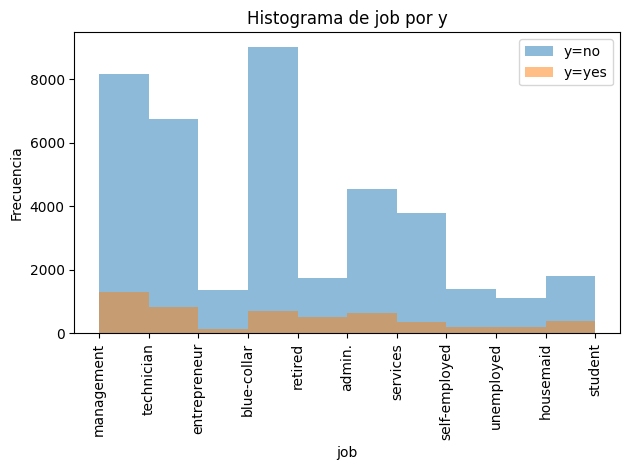

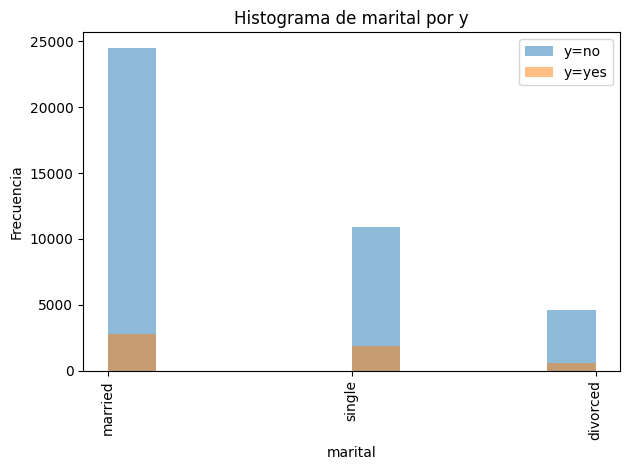

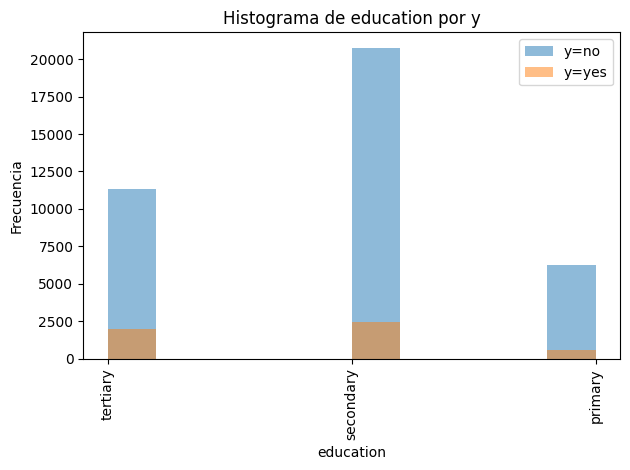

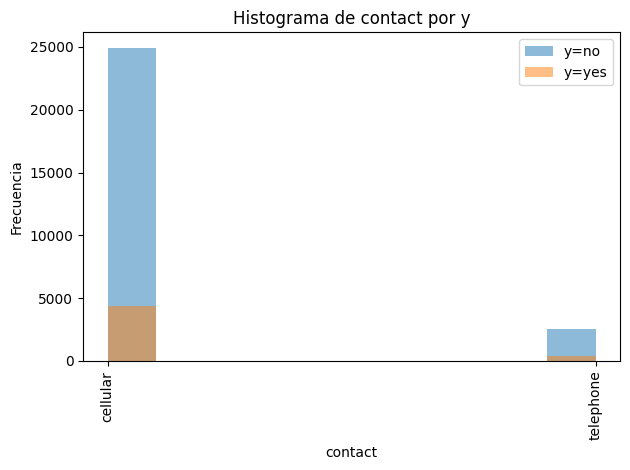

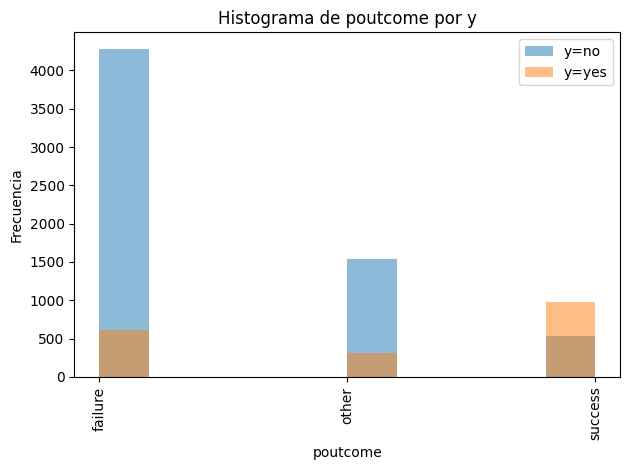

In [6]:
var_cat = ["job", "marital", "education","contact", "poutcome"]
target = "y"


for col in var_cat:
    fig, ax = plt.subplots()
    # Para cada valor de la columna binaria (0 y 1)
    for group in consolidado[target].unique():
        data = consolidado[consolidado[target] == group][col].dropna()
        ax.hist(data, bins=10, alpha=0.5, label=f"{target}={group}")
    ax.set_title(f"Histograma de {col} por {target}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    ax.legend()
    # Rotar etiquetas del eje x
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()




---


*Escriba* su respuesta en esta celda...


---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

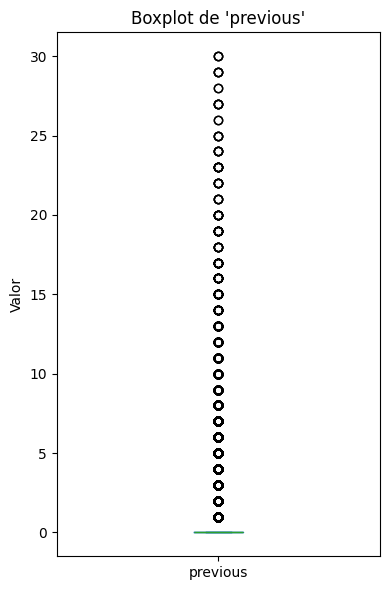

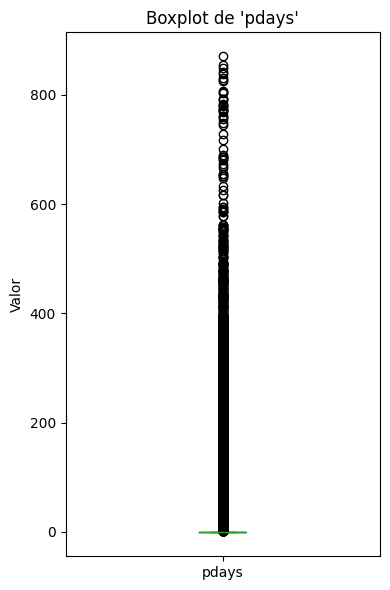

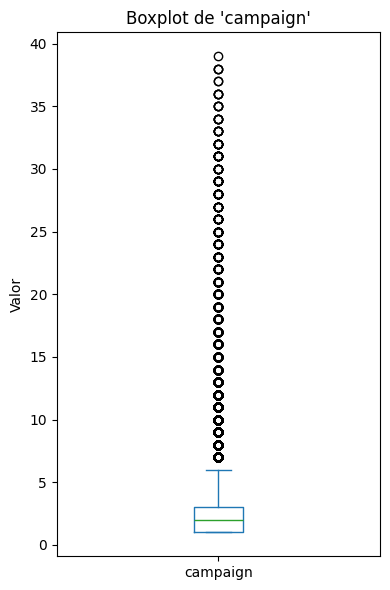

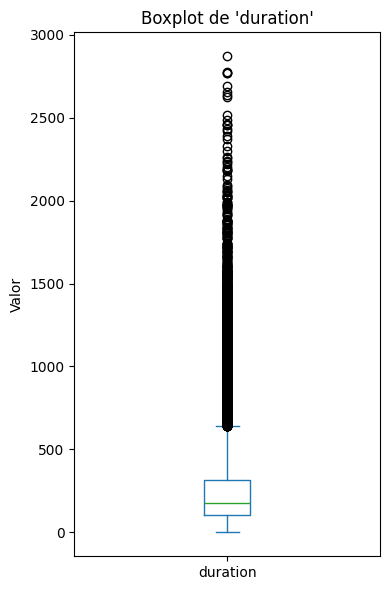

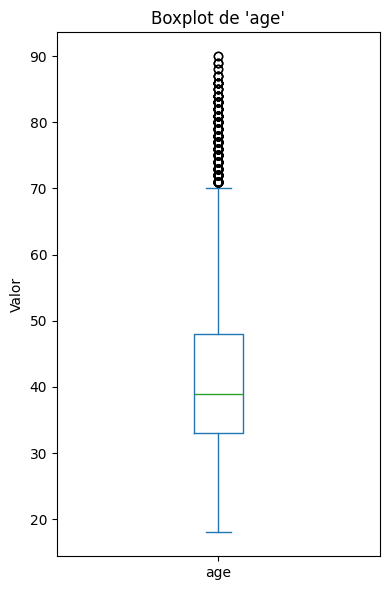

In [26]:
import matplotlib.pyplot as plt

num = ["previous", "pdays", "campaign", "duration", "age"]

for col in num:
    plt.figure(figsize=(4, 6))
    # Usando pandas directamente:
    consolidado[col].plot.box()
    
    # Si prefieres la sintaxis de pandas boxplot:
    # pd.DataFrame(consolidado[col]).boxplot()
    
    plt.title(f"Boxplot de '{col}'")
    plt.ylabel("Valor")
    plt.tight_layout()
    plt.show()





---


Yo lo dejaria la mayoria, aunque son outliers, siguen siendo datos que estan muy juntos, puede tener sentido dejar la mayoria. Se eliminan los outliers que ya empiezan a estar solos



---

In [25]:
consolidado = consolidado[consolidado["duration"] <= 3000]
consolidado = consolidado[consolidado["age"] <= 90]
consolidado = consolidado[consolidado["campaign"] <= 40]
consolidado = consolidado[consolidado["previous"] <= 30]


In [ ]:
import matplotlib.pyplot as plt

num = ["previous", "pdays", "campaign", "duration", "age"]

for col in num:
    plt.figure(figsize=(4, 6))
    # Usando pandas directamente:
    consolidado[col].plot.box()
    
    # Si prefieres la sintaxis de pandas boxplot:
    # pd.DataFrame(consolidado[col]).boxplot()
    
    plt.title(f"Boxplot de '{col}'")
    plt.ylabel("Valor")
    plt.tight_layout()
    plt.show()


In [ ]:
#### Se ve que ahora si estan más juntos los datos

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas No Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [8]:
X["education"].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [9]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
noBinCat= ["job","marital","education","poutcome"]
multinivel=["month","education"]
dummies=["contact"]
drop_cols=["day_of_week","job","marital","education","poutcome"]

preprocessor = ColumnTransformer([
    ("numericas",StandardScaler(),num),
    ("noBinCat",OneHotEncoder(), noBinCat),
    ("Dummies",OneHotEncoder(),dummies),

    ('ord_norm',
        Pipeline([
            ('ord', OrdinalEncoder(categories=[
                # especifica la lista ordenada para cada columna
                ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                ['tertiary', 'secondary', 'primary']
            ])),
            ('mm', MinMaxScaler())
        ]),
        multinivel),
        ("drop","drop",drop_cols)
])
pipeline = Pipeline([
    ('preproc', preprocessor)
])


print("Forma original:", X.shape)

X_proc = pipeline.fit_transform(X)

Forma original: (45211, 16)


## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.2, random_state=123, stratify=y)

### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

modelo_no_regularizado = DecisionTreeClassifier(class_weight='balanced' ,random_state=123)
modelo_no_regularizado.fit(X_train, y_train)

y_pred_train = modelo_no_regularizado.predict(X_train)
print("F1 Score (train):",modelo_no_regularizado.score(X_train, y_train))
print("F1 Score (test):",modelo_no_regularizado.score(X_test, y_test))



F1 Score (train): 1.0
F1 Score (test): 0.8692911644365808


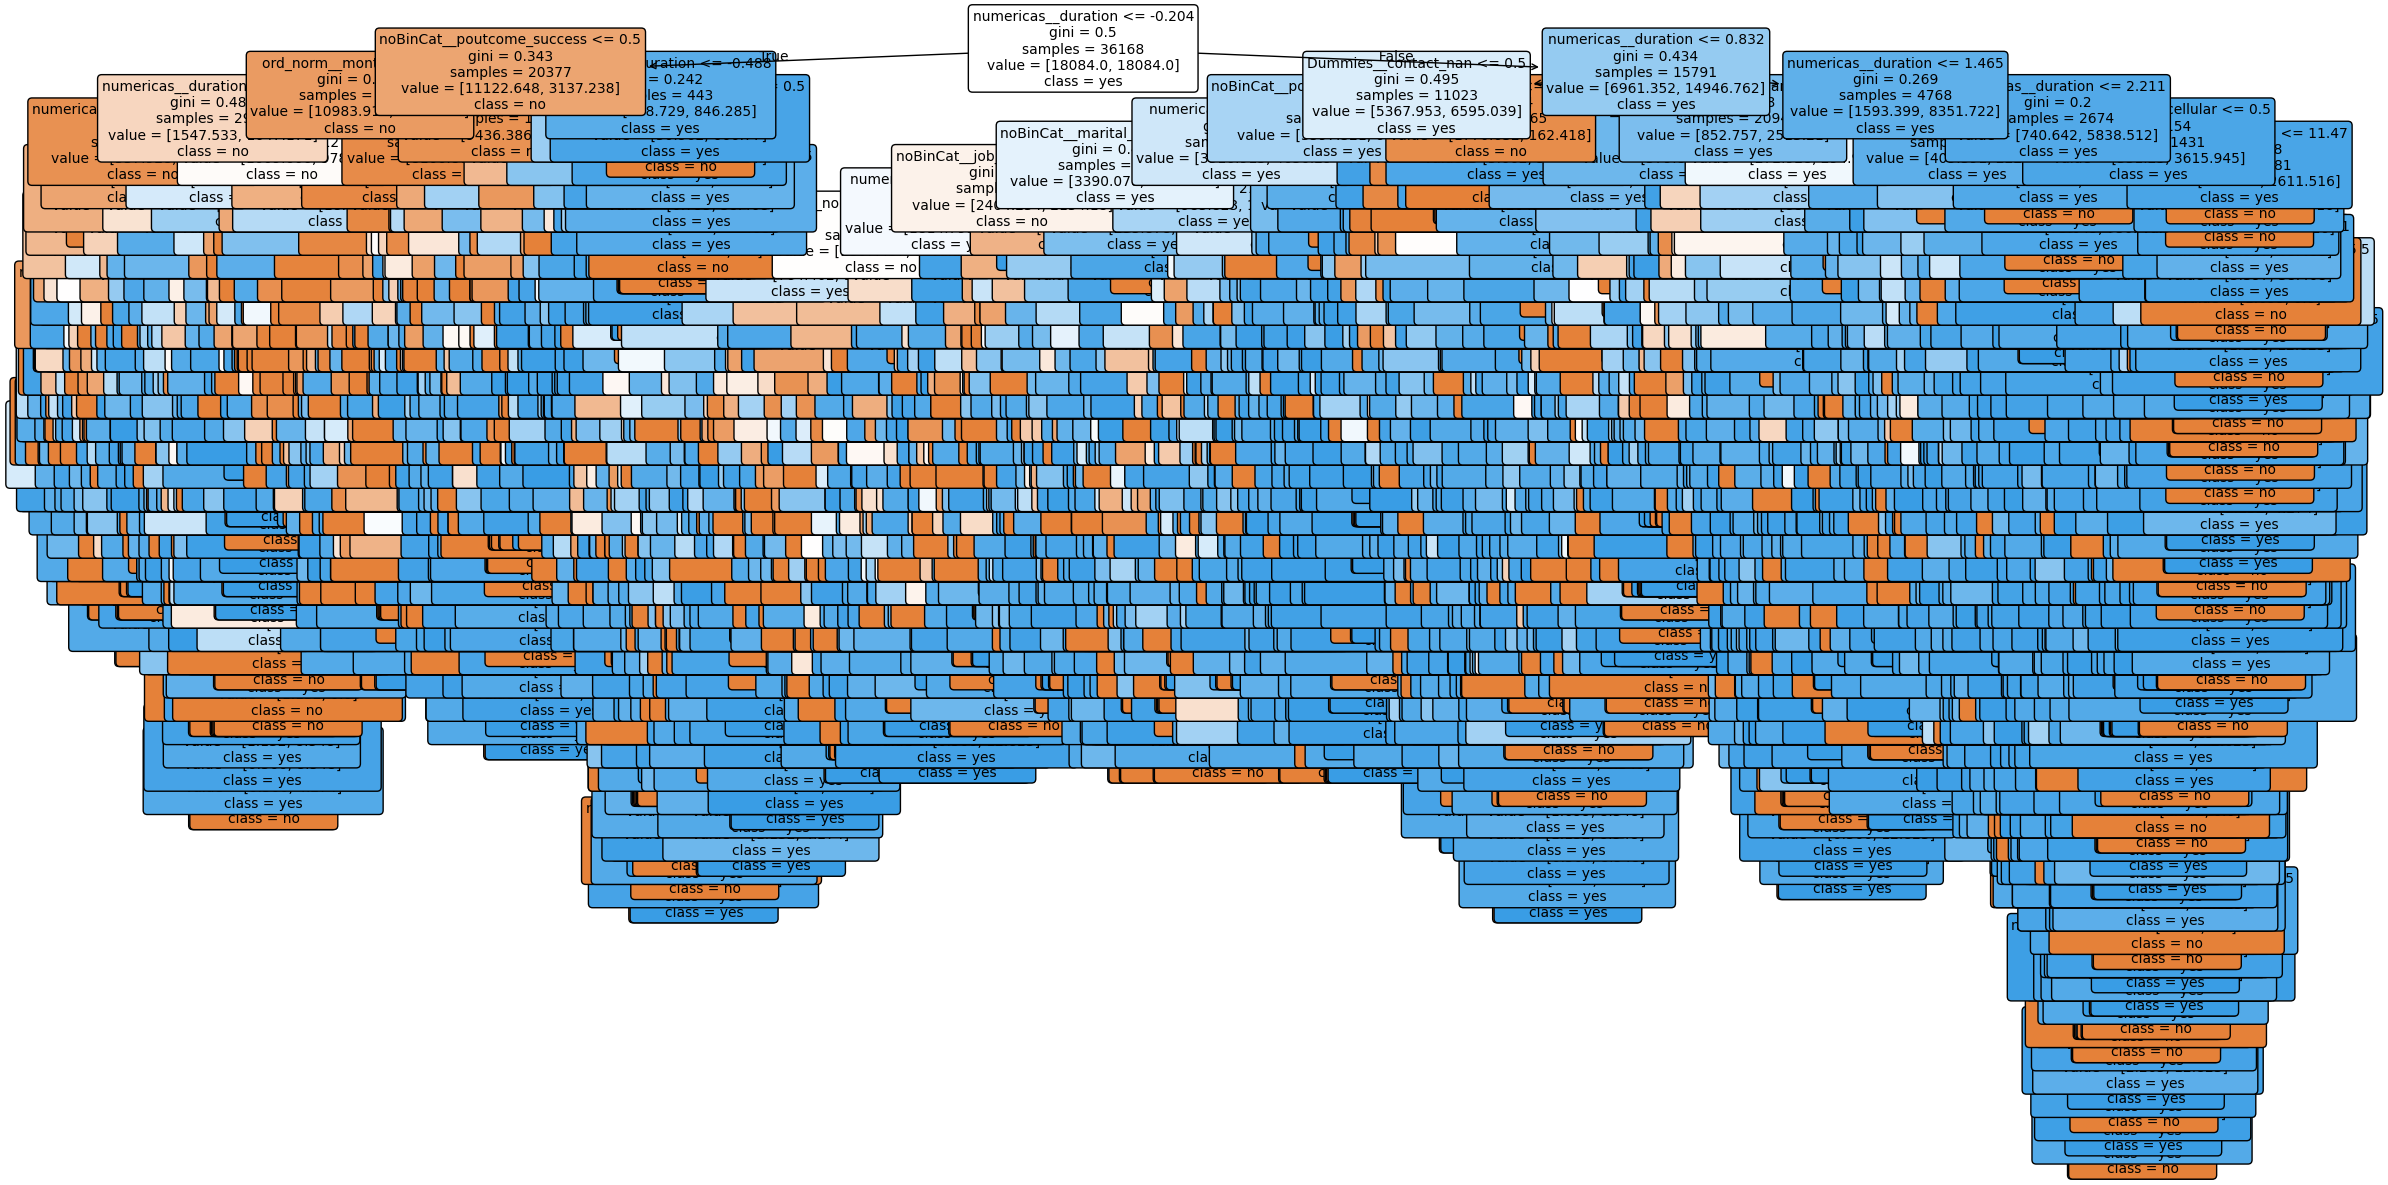

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = pipeline.named_steps['preproc'].get_feature_names_out()


plt.figure(figsize=(24,12))
tree.plot_tree(
    modelo_no_regularizado,
    feature_names=feature_names,
    class_names=[str(c) for c in modelo_no_regularizado.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()






---


*Escriba* su respuesta en esta celda...


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

modelo_levemente_regularizado = DecisionTreeClassifier(class_weight='balanced' ,random_state=123, max_depth=16)
modelo_levemente_regularizado.fit(X_train, y_train)

y_pred_train = modelo_levemente_regularizado.predict(X_train)
print("F1 Score (train):",modelo_levemente_regularizado.score(X_train, y_train))
print("F1 Score (test):",modelo_levemente_regularizado.score(X_test, y_test))

F1 Score (train): 0.9056901128069011
F1 Score (test): 0.8361163330753069


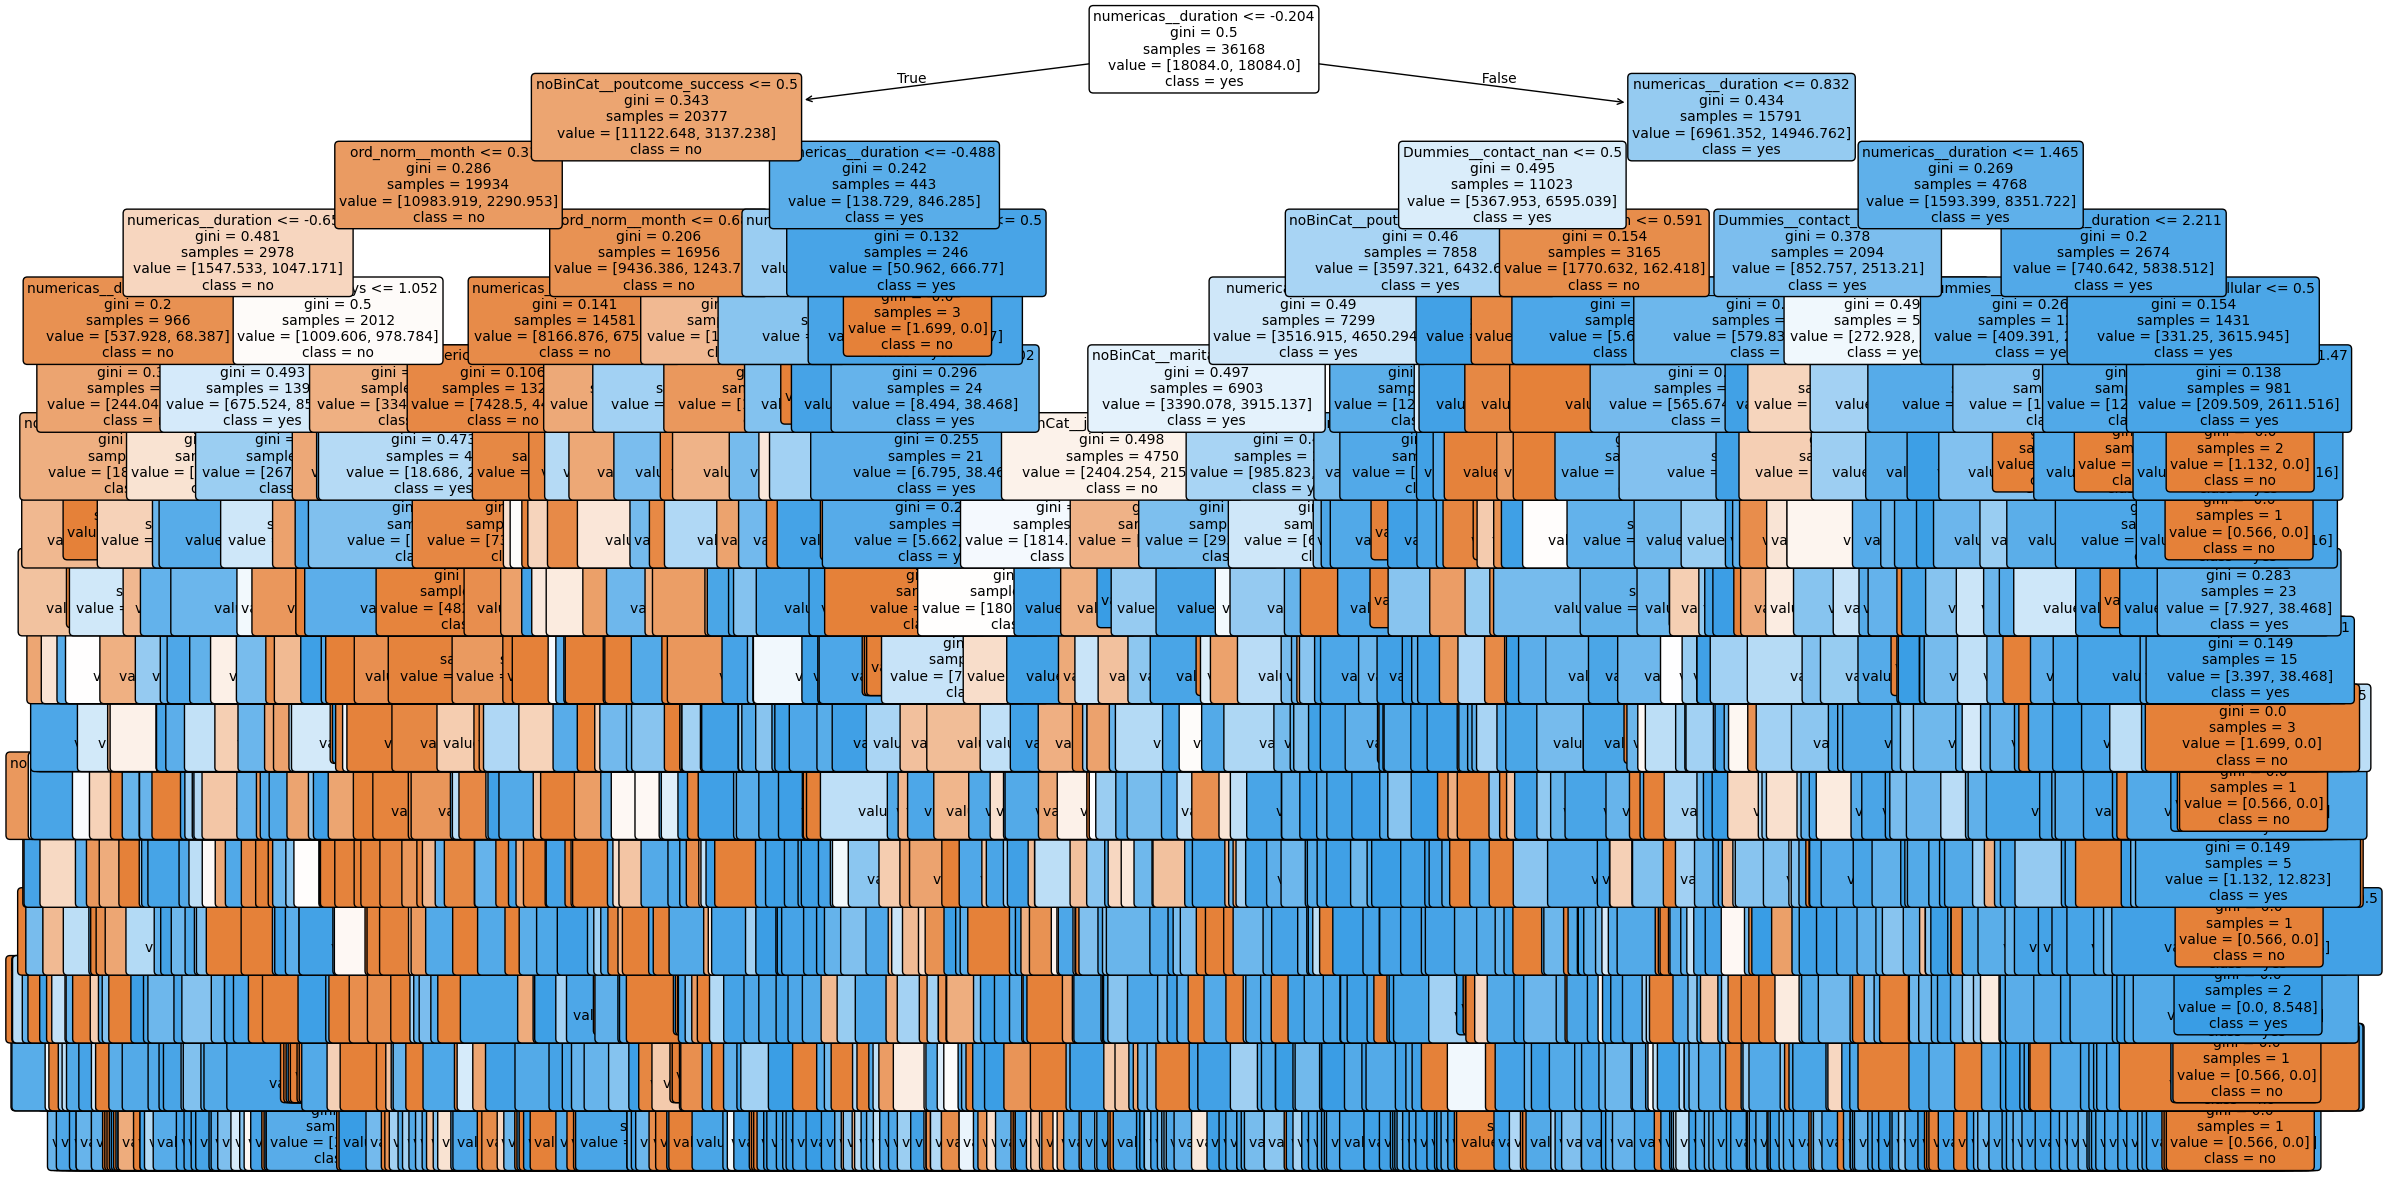

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = pipeline.named_steps['preproc'].get_feature_names_out()


plt.figure(figsize=(24,12))
tree.plot_tree(
    modelo_levemente_regularizado,
    feature_names=feature_names,
    class_names=[str(c) for c in modelo_levemente_regularizado.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()






---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

modelo_regularizado = DecisionTreeClassifier(class_weight='balanced' ,random_state=123, max_depth=8)
modelo_regularizado.fit(X_train, y_train)

y_pred_train = modelo_regularizado.predict(X_train)
print("F1 Score (train):",modelo_regularizado.score(X_train, y_train))
print("F1 Score (test):",modelo_regularizado.score(X_test, y_test))

F1 Score (train): 0.8253981420039814
F1 Score (test): 0.8090235541302665


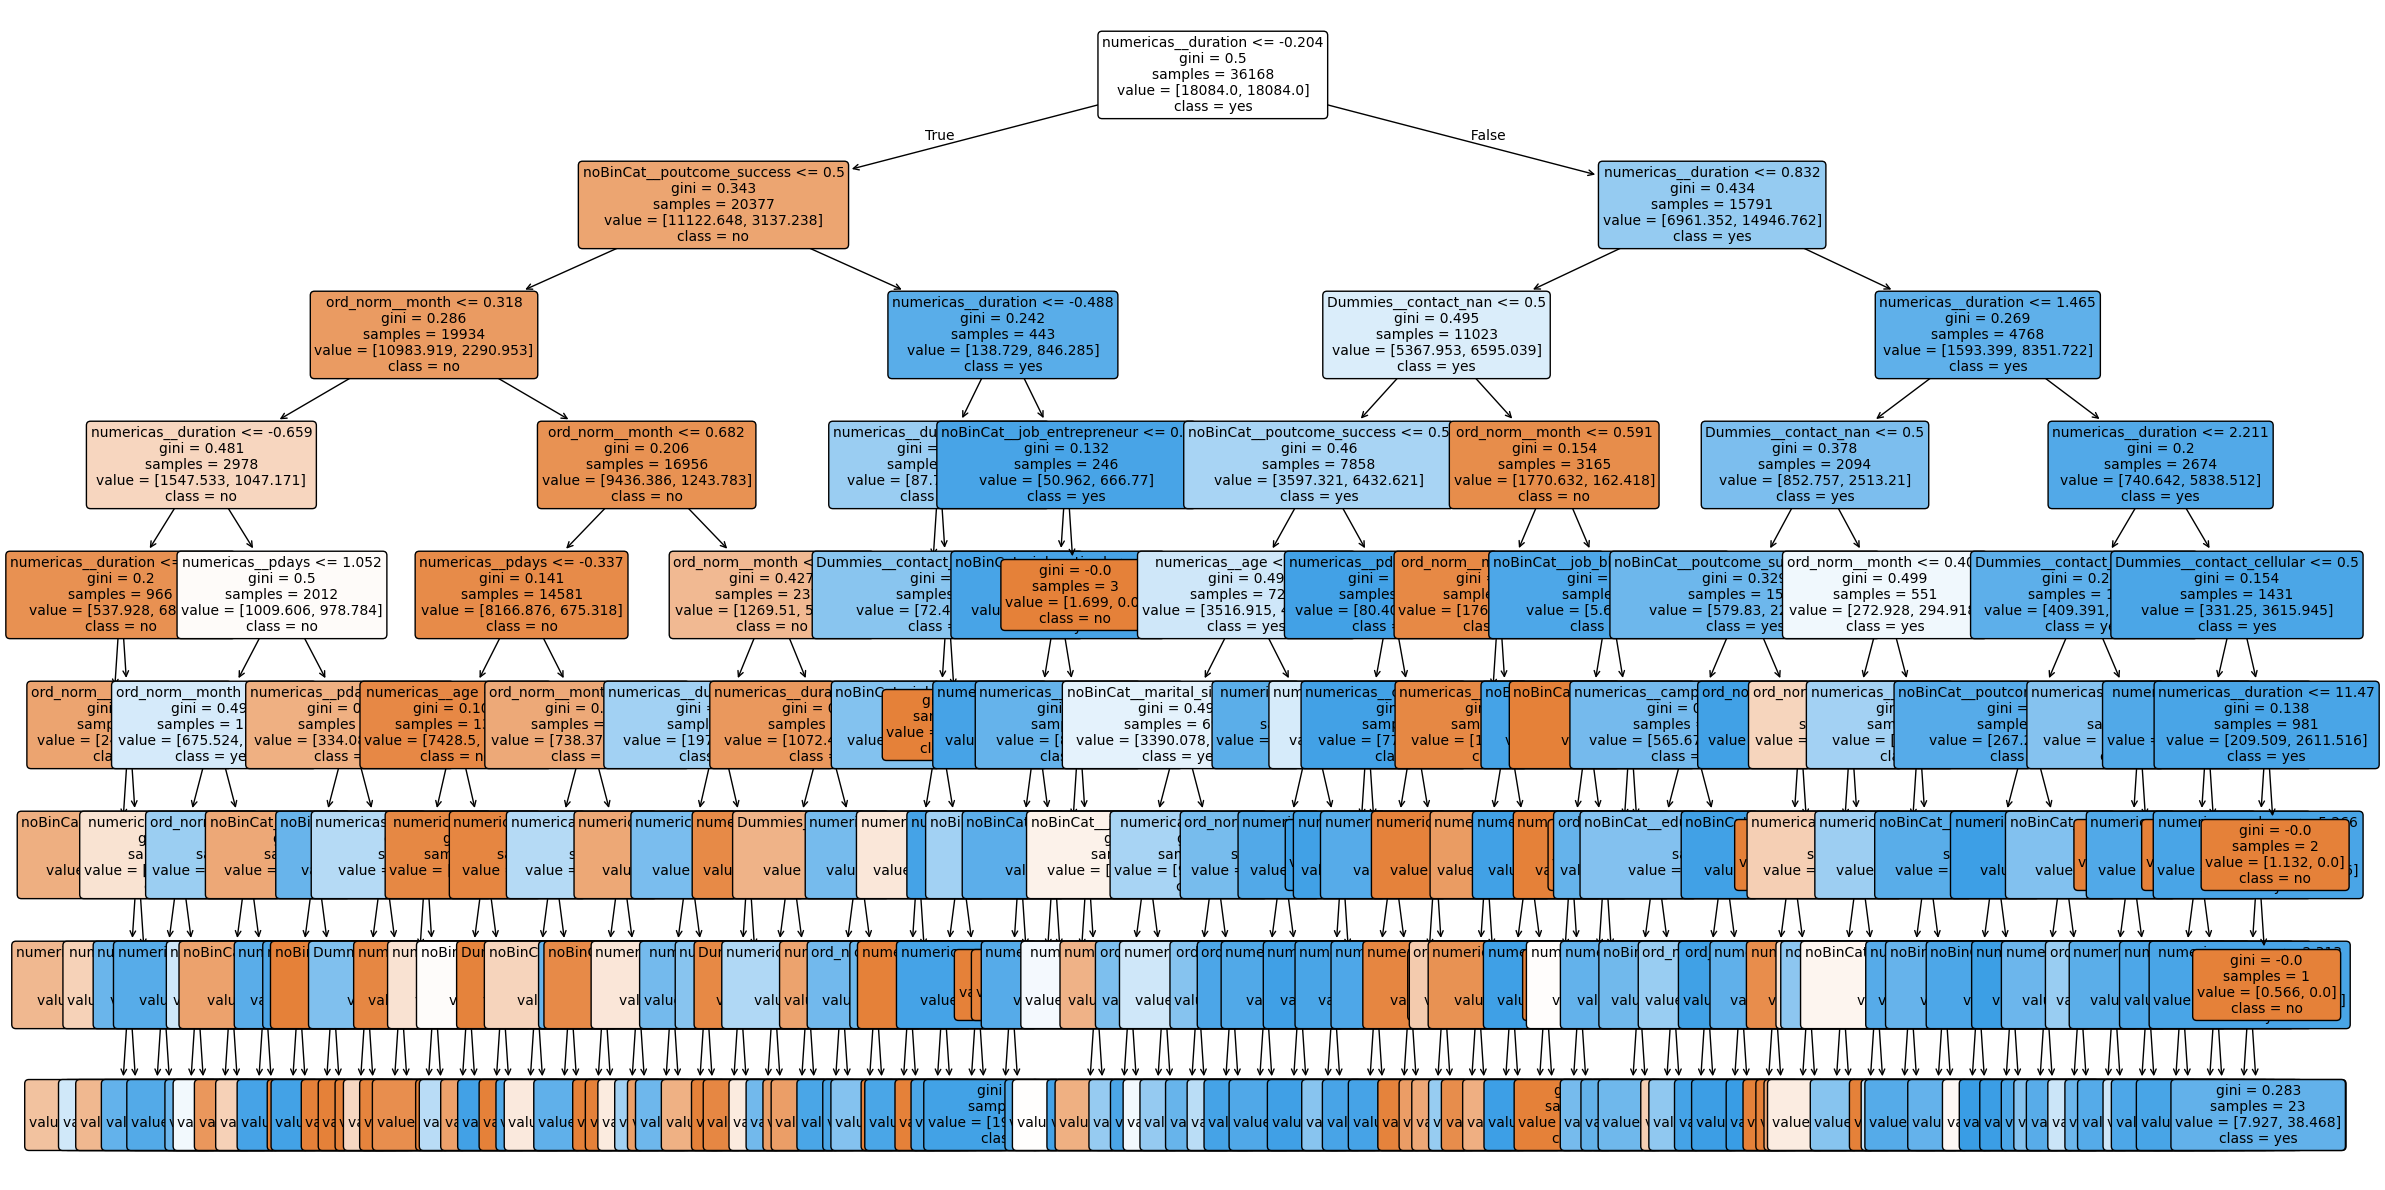

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = pipeline.named_steps['preproc'].get_feature_names_out()


plt.figure(figsize=(24,12))
tree.plot_tree(
    modelo_regularizado,
    feature_names=feature_names,
    class_names=[str(c) for c in modelo_regularizado.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

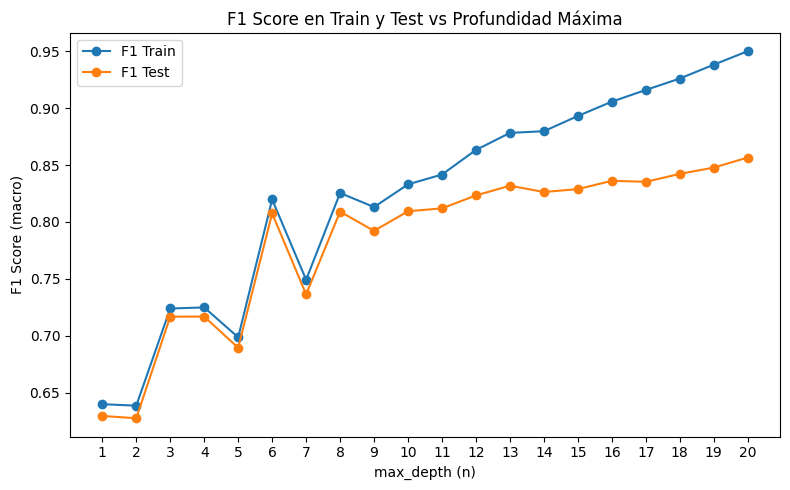

In [17]:

# 2) Entrena 20 árboles con max_depth = 1..20 y calcula F1
depths = list(range(1, 21))
f1_train = []
f1_test = []

for n in depths:
    clf = DecisionTreeClassifier(
        max_depth=n,
        class_weight='balanced',
        random_state=123
    )
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    f1_train.append(clf.score(X_train,y_train))
    f1_test.append(clf.score(X_test,y_test))

# 3) Grafica F1 Train vs F1 Test
plt.figure(figsize=(8, 5))
plt.plot(depths, f1_train, marker='o', label='F1 Train')
plt.plot(depths, f1_test, marker='o', label='F1 Test')
plt.xlabel('max_depth (n)')
plt.ylabel('F1 Score (macro)')
plt.title('F1 Score en Train y Test vs Profundidad Máxima')
plt.xticks(depths)
plt.legend()
plt.tight_layout()
plt.show()




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [ ]:
# Importamos las librerías que usaremos en esta pregunta
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = [{"n_estimators":[100, 1000] ,'max_depth': [10, 50, 100], 'min_samples_leaf': [2, 4]},] #combinación de parámetros
rf = RandomForestClassifier(random_state = 123, criterion='entropy', class_weight="balanced")

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'accuracy', return_train_score=True)


In [20]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 123, criterion='entropy', max_depth = 50, min_samples_leaf = 2)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9023554130266505

### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [21]:
from sklearn.model_selection import train_test_split

y.replace({'no': 0, 'yes': 1}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.2, random_state=123, stratify=y)

C:\Users\ferna\AppData\Local\Temp\ipykernel_13408\50136194.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace({'no': 0, 'yes': 1}, inplace=True)
C:\Users\ferna\AppData\Local\Temp\ipykernel_13408\50136194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({'no': 0, 'yes': 1}, inplace=True)


In [22]:
from xgboost import XGBClassifier

param_grid = [{"n_estimators":[100, 1000] ,'max_depth': [5, 50, 100], 'learning_rate': [0.05, 0.1, 0.5], 'max_leaves':[2, 4, 10,]}] #combinación de parámetros
xgb = XGBClassifier(random_state = 12)

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring = 'accuracy', return_train_score=True)
grid_search.fit(X_train, y_train) #entrenamos el grid search
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 4, 'n_estimators': 1000}

In [23]:
xgb = XGBClassifier(random_state = 123, n_estimators=1000, max_depth=5, learning_rate=0.1, max_leaves=4)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test) ##accuracy en el test set

0.9048988167643481

### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f1)


0.39723032069970843


C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).




---


*Escriba* su respuesta en esta celda...


---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [29]:
import pandas as pd

# 1) Carga el CSV desde el enlace

df = pd.read_csv("https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv")

# 2) Elimina las columnas de código
df = df.drop(['Series Code', 'Country Code'], axis=1)

df_wide = (
    df
    .pivot(index='Country Name',    # filas: cada país
           columns="Series Name",          # columnas: cada año
           values='2023 [YR2023]')
                       # contenido: el valor de exportación
    .reset_index()
)
df_wide= df_wide.drop("GDP growth (annual %)", axis=1)


### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [ ]:
drop_countries=[
"Africa Eastern and Southern"  
, "Africa Western and Central"  
, "Arab World"  
, "Caribbean small states"  
, "Central Europe and the Baltics"  
, "Early-demographic dividend"  
, "East Asia & Pacific"  
, "East Asia & Pacific (IDA & IBRD countries)"  
, "East Asia & Pacific (excluding high income)"  
, "Euro area"  
, "Europe & Central Asia"  
, "Europe & Central Asia (IDA & IBRD countries)"  
, "Europe & Central Asia (excluding high income)"  
, "European Union"  
, "Fragile and conflict affected situations"  
, "Heavily indebted poor countries (HIPC)"  
, "High income"  
, "IBRD only"  
, "IDA & IBRD total"  
, "IDA blend"  
, "IDA only"  
, "IDA total"  
, "Late-demographic dividend"  
, "Latin America & Caribbean"  
, "Latin America & Caribbean (excluding high income)"  
, "Latin America & the Caribbean (IDA & IBRD countries)"  
, "Least developed countries: UN classification"  
, "Low & middle income"  
, "Low income"  
, "Lower middle income"  
, "Middle East & North Africa"  
, "Middle East & North Africa (IDA & IBRD countries)"  
, "Middle East & North Africa (excluding high income)"  
, "Middle income"  
, "North America"  
, "Not classified"  
, "OECD members"  
, "Other small states"  
, "Pacific island small states"  
, "Post-demographic dividend"  
, "Pre-demographic dividend"  
, "Small states"  
, "South Asia"  
, "South Asia (IDA & IBRD)"  
, "Sub-Saharan Africa"  
, "Sub-Saharan Africa (IDA & IBRD countries)"  
, "Sub-Saharan Africa (excluding high income)"  
, "Upper middle income"  
, "World"
]
df_wide = df_wide[~df_wide['Country Name'].isin(drop_countries)]

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [ ]:
import numpy as np
df_wide.replace("..", np.nan, inplace=True)
cols_to_numeric = [c for c in df_wide.columns if c != "Country Name"]

# 3) Convierte sólo esas columnas
df_wide[cols_to_numeric] = df_wide[cols_to_numeric].apply(pd.to_numeric, errors="coerce")


C:\Users\ferna\AppData\Local\Temp\ipykernel_15388\467261680.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_wide.replace("..", np.nan, inplace=True)


In [ ]:
df_wide.describe()

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
count                                               149.000000               
mean                                                  2.726255               
std                                                   7.416283               
min                                                   0.000000               
25%                                                   0.343928               
50%                                                   0.794963               
75%                                                   2.120083               
max                                                  63.703068               

Series Name  Computer; communications and other services (% of commercial service exports)  \
count                                               161.000000                               
mean                                                 35.005284                               
std                                                  23.550764                               
min                                                   0.935706                               
25%                                                  13.309551                               
50%                                                  32.273353                               
75%                                                  53.862266                               
max                                                  95.860793                               

Series Name  Exports of goods and services (% of GDP)  \
count                                      158.000000   
mean                                        45.398868   
std                                         33.331007   
min                                          1.108109   
25%                                         23.637110   
50%                                         38.790357   
75%                                         56.494967   
max                                        212.530618   

Series Name  Food exports (% of merchandise exports)  \
count                                     149.000000   
mean                                       24.136526   
std                                        23.862474   
min                                         0.079874   
25%                                         8.338115   
50%                                        15.056512   
75%                                        32.790842   
max                                        98.210416   

Series Name  Fuel exports (% of merchandise exports)  \
count                                     145.000000   
mean                                       14.275881   
std                                        23.215387   
min                                         0.000000   
25%                                         0.498740   
50%                                         4.097826   
75%                                        15.770449   
max                                        95.516439   

Series Name  High-technology exports (% of manufactured exports)  \
count                                               147.000000     
mean                                                 11.352849     
std                                                  13.507894     
min                                                   0.000000     
25%                                                   2.226174     
50%                                                   6.030929     
75%                                                  16.841983     
max                                                  72.315489     

Series Name  ICT service exports (% of service exports; BoP)  \
count                                             157.000000   
mean                                               10.234009   
std                                                11.534976   
min                                                 0.043

### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

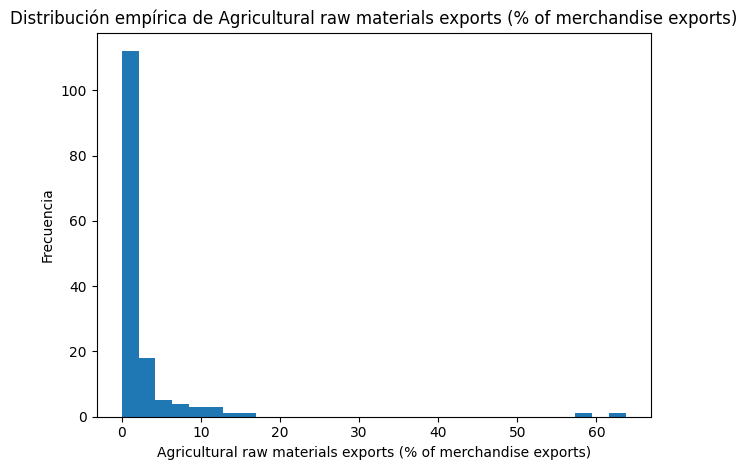

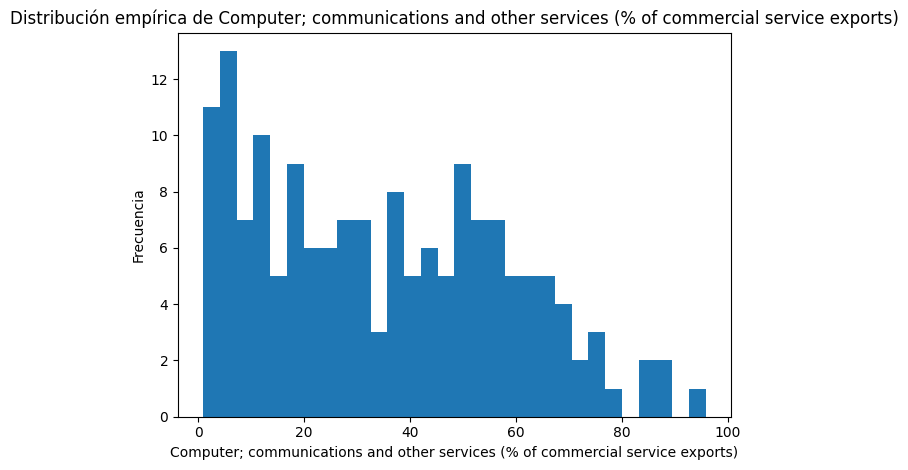

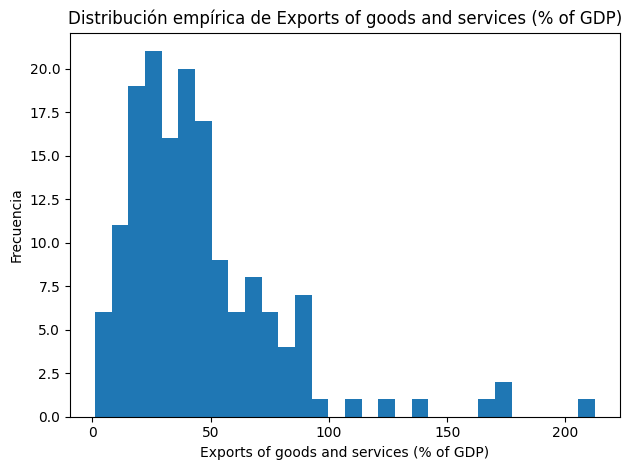

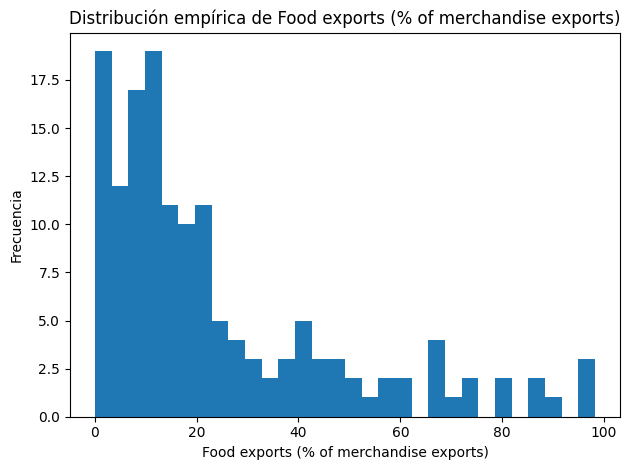

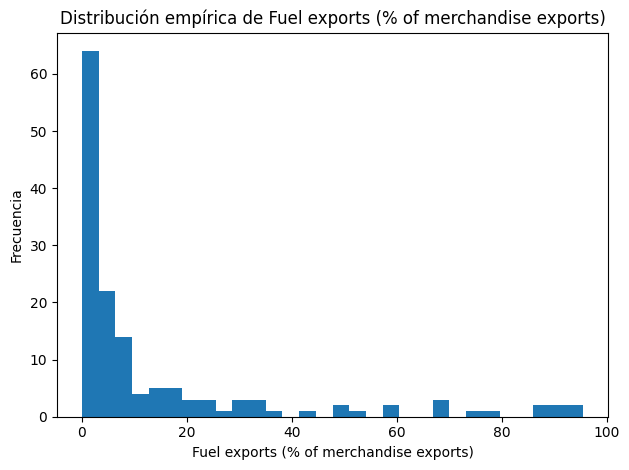

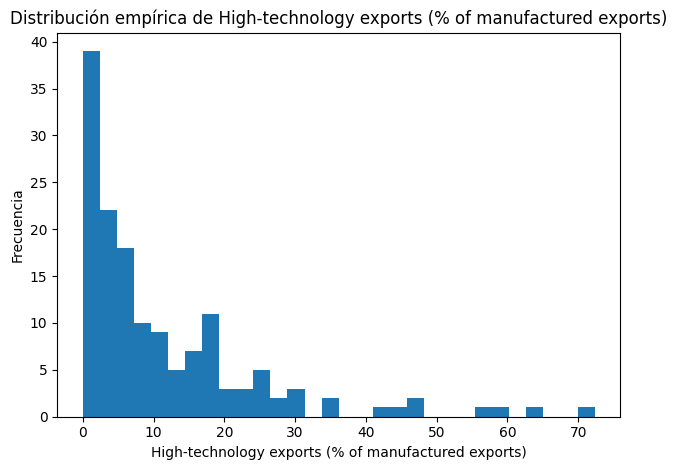

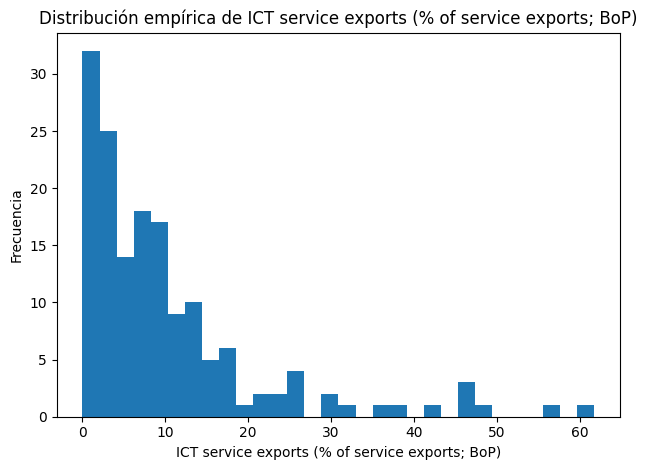

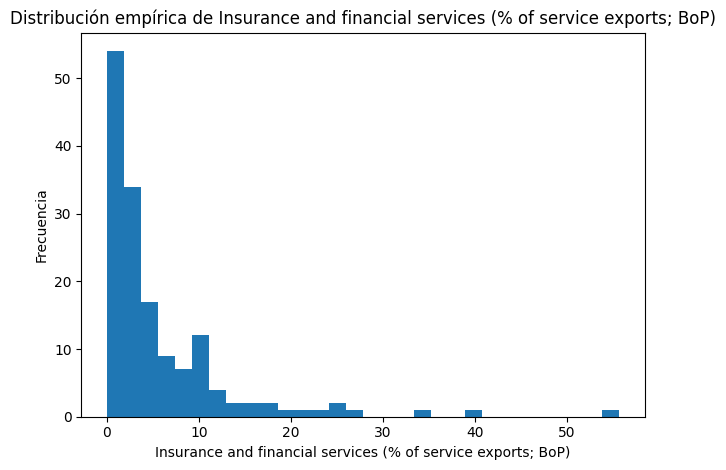

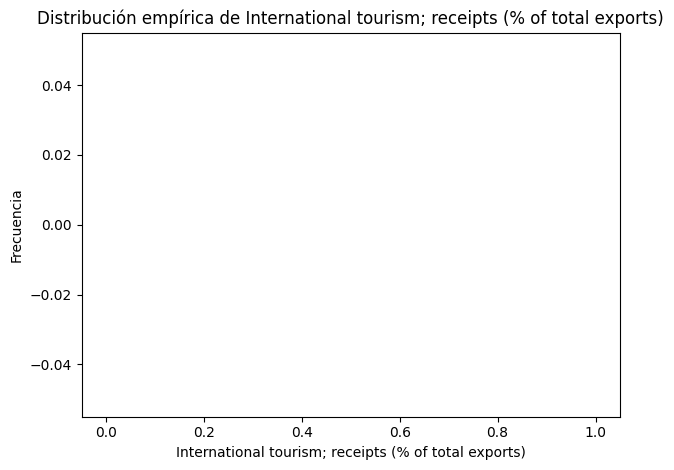

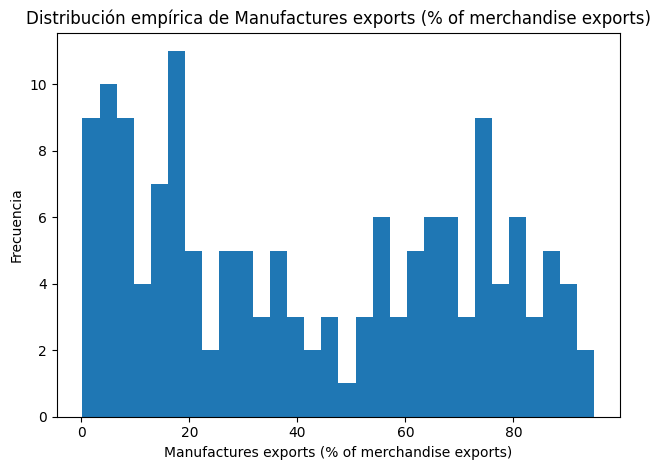

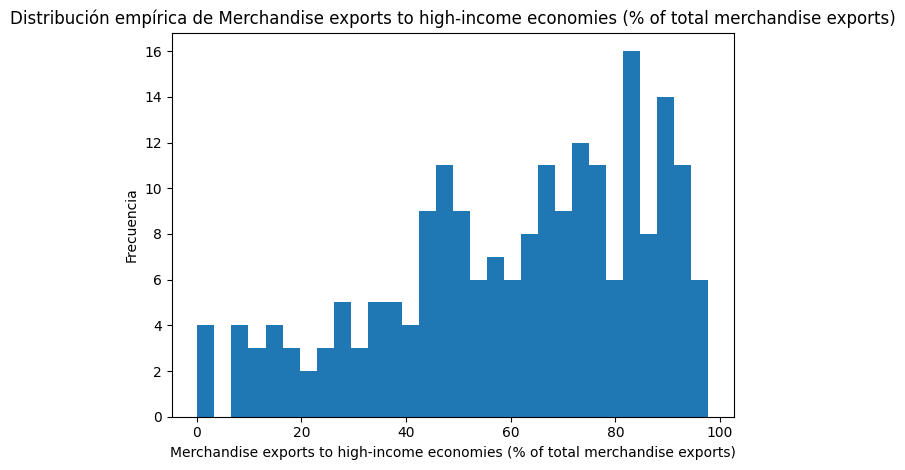

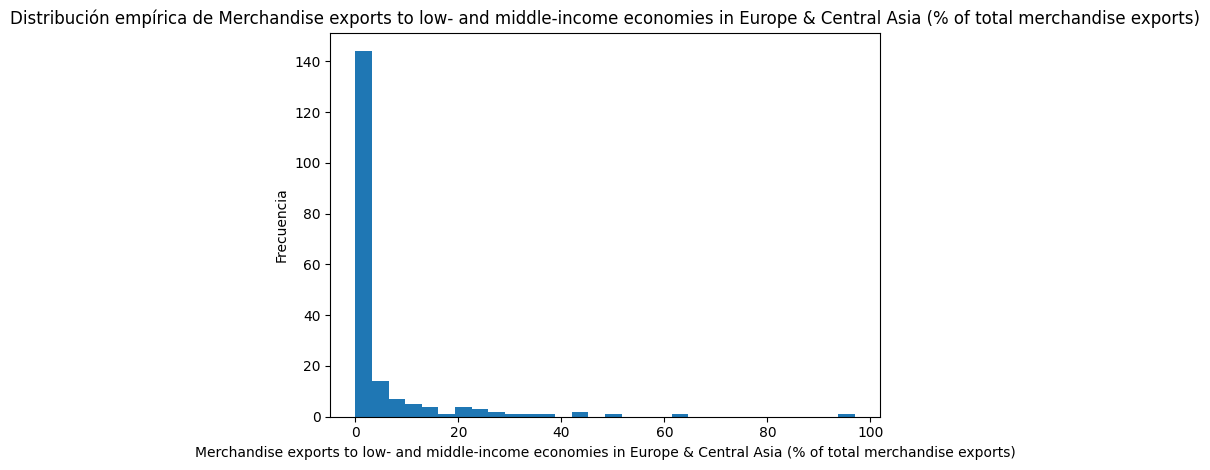

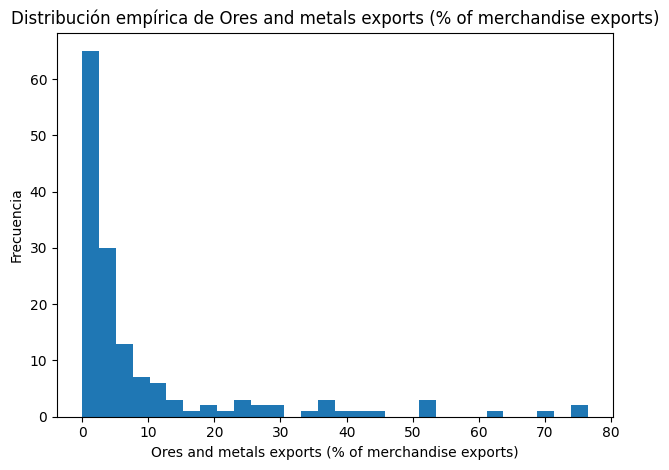

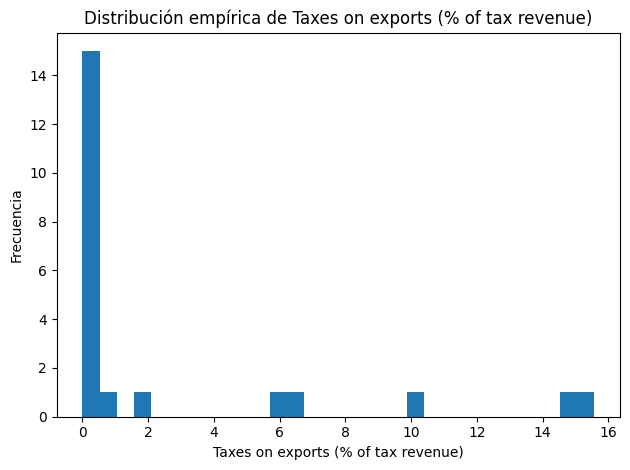

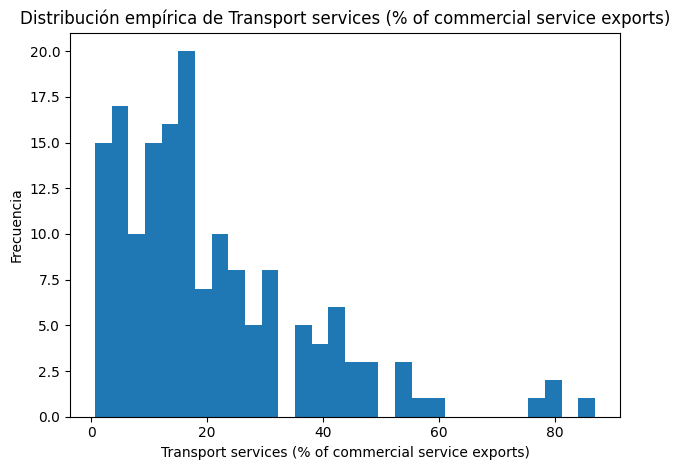

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionamos las columnas numéricas
num_cols = df_wide.select_dtypes(include=[np.number]).columns.tolist()

# Graficamos la distribución empírica de cada variable numérica
for col in num_cols:
    plt.figure()
    plt.hist(df_wide[col].dropna(), bins=30)
    plt.title(f'Distribución empírica de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()




---


*Escriba* su respuesta en esta celda...


---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


In [ ]:
missing_counts = df_wide.isnull().sum()
print(missing_counts)
missing_pct = df_wide.isnull().mean() * 100
print(missing_pct)

Series Name
Country Name                                                                                                           0
Agricultural raw materials exports (% of merchandise exports)                                                         68
Computer; communications and other services (% of commercial service exports)                                         56
Exports of goods and services (% of GDP)                                                                              59
Food exports (% of merchandise exports)                                                                               68
Fuel exports (% of merchandise exports)                                                                               72
High-technology exports (% of manufactured exports)                                                                   70
ICT service exports (% of service exports; BoP)                                                                       60
Insurance and financ

In [ ]:
df_wide = df_wide.drop(['Taxes on exports (% of tax revenue)', 'International tourism; receipts (% of total exports)'], axis=1)

In [ ]:
na_por_fila = df_wide.isna().sum(axis=1)
dist_na = na_por_fila.value_counts().sort_index()

print("Conteo de filas según número de NA:")
print(dist_na)


Conteo de filas según número de NA:
0     102
1      26
2       4
3       1
4       9
5       3
6      14
7      15
8       2
9       1
10     15
11     14
12      2
13      9
Name: count, dtype: int64


In [ ]:
df_wide = df_wide[~na_por_fila.isin([10, 11, 12, 13])]

In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge


num_cols = df_wide.select_dtypes(include='number').columns.tolist()
df_numeric = df_wide[num_cols].copy()


rng = np.random.RandomState(123)

# Creamos una matriz booleana “posibles_mask” que sea True donde df_numeric NO es NA
posibles_mask = df_numeric.notna().values  # array booleana (n_filas × n_cols)

# Ahora generamos aleatoriamente un 10% de True en toda la matriz
aleatorio_10 = rng.rand(*df_numeric.shape) < 0.1  # también (n_filas × n_cols)

# La máscara final “mask” solo marca True en aquellas celdas que
#    • originalmente no eran NA  → posibles_mask == True
#    • y fueron seleccionadas aleatoriamente    → aleatorio_10 == True
mask = posibles_mask & aleatorio_10

# -------------------------------------------------------------------
# 3) Guardamos los valores verdaderos ANTES de enmascarar
#    De esta forma podemos compararlos luego con la imputación
true_vals = df_numeric.values[mask]  # array unidimensional de valores reales

# 4) Creamos una copia y ponemos esos valores a np.nan
df_masked = df_numeric.copy()
df_masked.values[mask] = np.nan

# -------------------------------------------------------------------
# 5) Definimos los imputadores a comparar
imputers = {
    'SimpleMean': SimpleImputer(strategy='mean'),
    'KNNImputer': KNNImputer(n_neighbors=5),
    'MICE_Tree': IterativeImputer(
        estimator=DecisionTreeRegressor(max_depth=5, random_state=123),
        max_iter=10,
        random_state=123
    ),
    'MICE_Bayesian': IterativeImputer(
        estimator=BayesianRidge(),
        max_iter=10,
        random_state=123
    )
}

# 6) Aplicar cada imputador y calcular métricas (RMSE y MAE) SOLO sobre las celdas enmascaradas
results = []
for name, imputer in imputers.items():
    # a) Ajusta al df_masked y devuelve un array imputado
    arr_imputed = imputer.fit_transform(df_masked)
    
    # b) Reconstruir un DataFrame con los mismos índices y columnas
    imputed_df = pd.DataFrame(arr_imputed, columns=df_numeric.columns, index=df_numeric.index)
    
    # c) Extraer los valores imputados en las posiciones “mask”
    pred_vals = imputed_df.values[mask]
    
    # d) Calcular RMSE y MAE comparando true_vals vs pred_vals
    rmse = np.sqrt(mean_squared_error(true_vals, pred_vals))
    mae  = mean_absolute_error(true_vals, pred_vals)
    
    results.append({
        'Method': name,
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

# 7) Mostrar resultados comparativos
results_df = pd.DataFrame(results)
from IPython.display import display
display(results_df)


C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Method     RMSE      MAE
0     SimpleMean  21.1140  15.3898
1     KNNImputer  20.1501  13.9632
2      MICE_Tree  20.9710  13.6995
3  MICE_Bayesian  18.3663  12.8014

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# 1. Identifica las columnas numéricas de df_wide
numeric_cols = df_wide.select_dtypes(include='number').columns.tolist()

# 2. Configura el imputer con BayesianRidge
mice_bayesian = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=123
)

# 3. Fit-transform SOLO sobre las columnas numéricas
array_imputado = mice_bayesian.fit_transform(df_wide[numeric_cols])

# 4. Reconstruye un DataFrame con los mismos nombres e índices
df_transitorio = pd.DataFrame(
    array_imputado,
    columns=numeric_cols,
    index=df_wide.index
)

# 5. Reemplaza las columnas numéricas en df_wide por las imputadas
df_wide[numeric_cols] = df_transitorio



Series Name         Country Name  \
3                        Albania   
4                        Algeria   
6                        Andorra   
7                         Angola   
8            Antigua and Barbuda   
..                           ...   
255                      Uruguay   
256                   Uzbekistan   
261           West Bank and Gaza   
264                       Zambia   
265                     Zimbabwe   

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
3                                                     0.406032               
4                                                     7.428570               
6                                                     0.415383               
7                                                     0.002748               
8                                                     0.000000               
..                                                         ...               
255                                                  14.085380               
256                                                   1.394247               
261                                                   0.763068               
264                                                   0.575244               
265                                                   1.249304               

Series Name  Computer; communications and other services (% of commercial service exports)  \
3                                                    24.430109                               
4                                                    59.162643                               
6                                                    12.881184                               
7                                                    59.439164                               
8                                                     5.881326                               
..                                                         ...                               
255                                                  48.005182                               
256                                                  19.053461                               
261                                                  51.183948                               
264                                                   6.296688                               
265                                                   6.428418                               

Series Name  Exports of goods and services (% of GDP)  \
3                                           38.665082   
4                                           23.619536   
6                                           61.491677   
7                                           40.856779   
8                                           43.897482   
..                                                ...   
255                                         27.497800   
256                                         23.689833   
261                                         19.593245   
264                                         40.846124   
265                                         21.579400   

Series Name  Food exports (% of merchandise exports)  \
3                                          11.964078   
4                                          12.171965   
6                                           1.089864   
7                                           0.451669   
8                                          79.539714   
..                                               ...   
255                                        66.156198   
256                                         8.728744   
261                                        21.395302   
264                                        10.614886   
265                                        20.307339   

Series Name  Fuel exports (% of merchandise exports)  \
3                                           6.345384   
4                              

## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

In [ ]:
import pandas as pd

# 2) Prepara un diccionario para guardar resultados
outlier_info = {}

# 3) Para cada columna numérica, calcula Q1, Q3, IQR, umbral y lista de outliers
for col in num_cols:
    series = df_wide[col].dropna()           # quitamos NaN para no afectar el cálculo de cuantiles
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    threshold = Q3 + 1.5 * IQR          # umbral “1.5 x IQR” (solo alto; podrías también hacer Q1 - 1.5*IQR para bajos)
    
    # Filtra los valores que estén por encima del umbral
    outliers = series[series > threshold].tolist()
    
    # Guarda la información en el diccionario
    outlier_info[col] = {
        'threshold': threshold,
        'outliers': outliers
    }

# 4) Muestra por columna el umbral y los valores que superan ese umbral
for col, info in outlier_info.items():
    print(f"Columna: {col}")
    print(f"  Umbral (Q3 + 1.5×IQR): {info['threshold']:.4f}")
    if len(info['outliers']) == 0:
        print("  No hay valores por encima de este umbral.")
    else:
        print(f"  Valores mayores a umbral ({len(info['outliers'])}):")
        print(f"    {info['outliers']}\n")


Columna: Agricultural raw materials exports (% of merchandise exports)
  Umbral (Q3 + 1.5×IQR): 6.7149
  Valores mayores a umbral (19):
    [7.428570496831904, 7.79274178334461, 58.1404591119706, 10.812116642970064, 11.6748806347761, 12.6077414739267, 9.67258056201782, 6.78824390461196, 12.72800908660037, 12.5710697931939, 9.7771245101759, 63.7030677905837, 6.86239495247464, 13.86510268171875, 9.76535916563518, 13.584573707507225, 8.460272600937293, 16.1619096248011, 14.0853800371243]

Columna: Computer; communications and other services (% of commercial service exports)
  Umbral (Q3 + 1.5×IQR): 109.2134
  Valores mayores a umbral (2):
    [152.1230647715323, 174.1332304671016]

Columna: Exports of goods and services (% of GDP)
  Umbral (Q3 + 1.5×IQR): 94.0266
  Valores mayores a umbral (8):
    [97.0188279262, 169.105788685534, 176.759868272113, 135.058214305059, 212.530618289922, 122.76554394888, 174.300145120981, 108.61087139274]

Columna: Food exports (% of merchandise exports)
  U

In [ ]:

# 2) Construye una lista de diccionarios con información de umbrales y outliers
data = []
datos = []
for col in num_cols:
    series = df_wide[col].dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    threshold = Q3 + 1.5 * IQR
    outlier_values = series[series > threshold].tolist()
    # Formateamos los outliers como cadena separada por comas (para caber en una celda)
    outlier_str = ", ".join([str(v) for v in outlier_values]) if outlier_values else ""
    data.append({
        'Column': col,
        'Threshold (Q3 + 1.5×IQR)': threshold,
        'Num Outliers': len(outlier_values),
        'Outlier Values': outlier_str
    })
    datos.append({"outliers": (threshold,outlier_values)})
# 3) Crea DataFrame y muéstralo
outliers_df = pd.DataFrame(data)
print(outliers_df.to_string())

                                                                                                               Column  Threshold (Q3 + 1.5×IQR)  Num Outliers                                                                                                                                                                                                                                                                                                                                                                            Outlier Values
0                                                       Agricultural raw materials exports (% of merchandise exports)                  6.714858            19                               7.428570496831904, 7.79274178334461, 58.1404591119706, 10.812116642970064, 11.6748806347761, 12.6077414739267, 9.67258056201782, 6.78824390461196, 12.72800908660037, 12.5710697931939, 9.7771245101759, 63.7030677905837, 6.86239495247464, 13.86510268171875, 9.76535916563518, 13

In [ ]:
df_final = df_wide[df_wide["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"] <= 29]
df_final = df_final[df_final["Agricultural raw materials exports (% of merchandise exports)"]<=13]
df_final = df_final[df_final["Exports of goods and services (% of GDP)"]<=101]
df_final = df_final[df_final["Food exports (% of merchandise exports)"]<=73]
df_final = df_final[df_final["Fuel exports (% of merchandise exports)"]<=42]
df_final = df_final[df_final["High-technology exports (% of manufactured exports)"]<=44]
df_final = df_final[df_final["ICT service exports (% of service exports; BoP)"]<=33]
df_final = df_final[df_final["Insurance and financial services (% of service exports; BoP)"]<=28]
df_final = df_final[df_final["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"]<=16]
df_final = df_final[df_final["Ores and metals exports (% of merchandise exports)"]<=16]
df_final = df_final[df_final["Transport services (% of commercial service exports)"]<=25]
#Que no sea el doble de theshold

In [ ]:
df_final

Series Name        Country Name  \
6                       Andorra   
10                    Argentina   
11                      Armenia   
12                        Aruba   
14                      Austria   
..                          ...   
244                     Tunisia   
249                      Uganda   
252              United Kingdom   
253               United States   
261          West Bank and Gaza   

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
6                                                     0.415383               
10                                                    0.685734               
11                                                    0.355695               
12                                                    0.117845               
14                                                    1.305623               
..                                                         ...               
244                                                   0.297208               
249                                                   1.910696               
252                                                   0.453417               
253                                                   1.728242               
261                                                   0.763068               

Series Name  Computer; communications and other services (% of commercial service exports)  \
6                                                    12.881184                               
10                                                   51.679412                               
11                                                   25.633454                               
12                                                    7.558318                               
14                                                   45.108584                               
..                                                         ...                               
244                                                  55.580693                               
249                                                  17.390098                               
252                                                  54.826680                               
253                                                  50.961588                               
261                                                  51.183948                               

Series Name  Exports of goods and services (% of GDP)  \
6                                           61.491677   
10                                          12.749246   
11                                          59.452086   
12                                          88.343786   
14                                          59.464567   
..                                                ...   
244                                         51.883382   
249                                         11.601709   
252                                         31.662677   
253                                         11.011511   
261                                         19.593245   

Series Name  Food exports (% of merchandise exports)  \
6                                           1.089864   
10                                         52.726767   
11                                         13.157450   
12                                         67.317356   
14                                          8.034781   
..                                               ...   
244                                        12.860624   
249                                        39.273111   
252                                         6.544867   
253                                         9.546455   
261                                        21.395302   

Series Name  Fuel exports (% of merchandise exports)  \
6                                           0.010148   
10                                         




---


*Escriba* su respuesta en esta celda...


---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [ ]:
from sklearn.datasets import load_wine #dataset
from sklearn.cluster import KMeans #kmeans
from scipy.spatial.distance import cdist #Distancia euclidianda utilizada para el elbow method

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final[num_cols] = scaler.fit_transform(df_final[num_cols])
df_final



Series Name        Country Name  \
6                       Andorra   
10                    Argentina   
11                      Armenia   
12                        Aruba   
14                      Austria   
..                          ...   
244                     Tunisia   
249                      Uganda   
252              United Kingdom   
253               United States   
261          West Bank and Gaza   

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
6                                                    -0.469603               
10                                                   -0.386168               
11                                                   -0.488024               
12                                                   -0.561430               
14                                                   -0.194858               
..                                                         ...               
244                                                  -0.506075               
249                                                  -0.008120               
252                                                  -0.457865               
253                                                  -0.064429               
261                                                  -0.362301               

Series Name  Computer; communications and other services (% of commercial service exports)  \
6                                                    -1.354481                               
10                                                    0.581308                               
11                                                   -0.718222                               
12                                                   -1.620059                               
14                                                    0.253465                               
..                                                         ...                               
244                                                   0.775957                               
249                                                  -1.129514                               
252                                                   0.738337                               
253                                                   0.545493                               
261                                                   0.556587                               

Series Name  Exports of goods and services (% of GDP)  \
6                                            1.092556   
10                                          -1.457618   
11                                           0.985846   
12                                           2.497442   
14                                           0.986499   
..                                                ...   
244                                          0.589856   
249                                         -1.517656   
252                                         -0.468079   
253                                         -1.548535   
261                                         -1.099544   

Series Name  Food exports (% of merchandise exports)  \
6                                          -1.251668   
10                                          1.545791   
11                                         -0.597900   
12                                          2.336244   
14                                         -0.875423   
..                                               ...   
244                                        -0.613980   
249                                         0.816931   
252                                        -0.956140   
253                                        -0.793527   
261                                        -0.151609   

Series Name  Fuel exports (% of merchandise exports)  \
6                                          -0.868447   
10                                         

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



In [ ]:
df_final

Series Name        Country Name  \
6                       Andorra   
10                    Argentina   
11                      Armenia   
12                        Aruba   
14                      Austria   
..                          ...   
244                     Tunisia   
249                      Uganda   
252              United Kingdom   
253               United States   
261          West Bank and Gaza   

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
6                                                    -0.469603               
10                                                   -0.386168               
11                                                   -0.488024               
12                                                   -0.561430               
14                                                   -0.194858               
..                                                         ...               
244                                                  -0.506075               
249                                                  -0.008120               
252                                                  -0.457865               
253                                                  -0.064429               
261                                                  -0.362301               

Series Name  Computer; communications and other services (% of commercial service exports)  \
6                                                    -1.354481                               
10                                                    0.581308                               
11                                                   -0.718222                               
12                                                   -1.620059                               
14                                                    0.253465                               
..                                                         ...                               
244                                                   0.775957                               
249                                                  -1.129514                               
252                                                   0.738337                               
253                                                   0.545493                               
261                                                   0.556587                               

Series Name  Exports of goods and services (% of GDP)  \
6                                            1.092556   
10                                          -1.457618   
11                                           0.985846   
12                                           2.497442   
14                                           0.986499   
..                                                ...   
244                                          0.589856   
249                                         -1.517656   
252                                         -0.468079   
253                                         -1.548535   
261                                         -1.099544   

Series Name  Food exports (% of merchandise exports)  \
6                                          -1.251668   
10                                          1.545791   
11                                         -0.597900   
12                                          2.336244   
14                                         -0.875423   
..                                               ...   
244                                        -0.613980   
249                                         0.816931   
252                                        -0.956140   
253                                        -0.793527   
261                                        -0.151609   

Series Name  Fuel exports (% of merchandise exports)  \
6                                          -0.868447   
10                                         

Text(0.5, 1.0, 'Elbow curve')

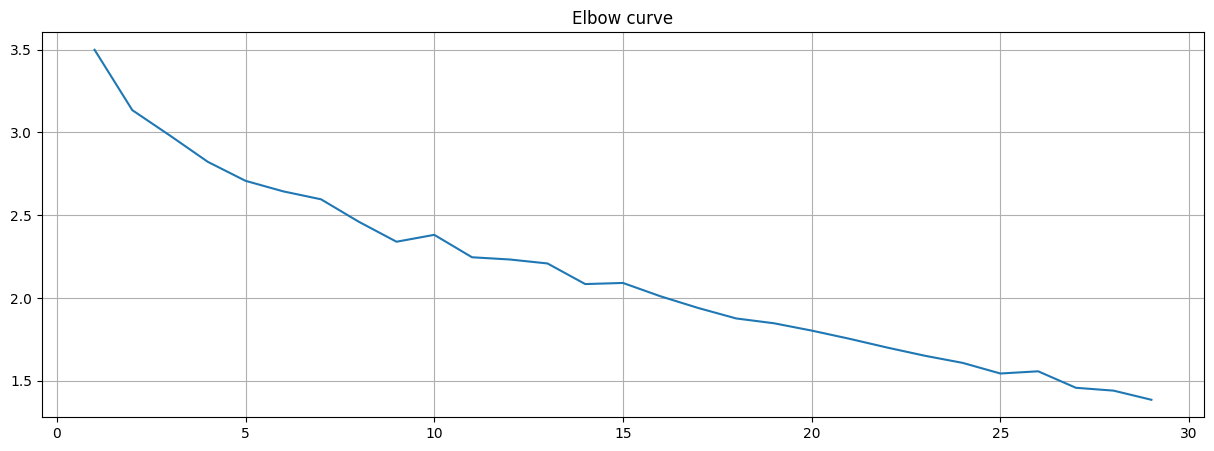

In [ ]:
import matplotlib.pyplot as plt

dispersion = []
df_muestra= df_final.drop("Country Name", axis=1)


for k in range(1, 30):
  model = KMeans(n_clusters=k)
  model.fit(df_muestra)
  #Distancia euclidiana para cada par (dato - centro del cluster)
  dist_ecl = cdist(df_muestra, model.cluster_centers_, 'euclidean')
  #Tomamos la distancia mínima (al centroide más cercano)
  min_dist = np.min(dist_ecl, axis=1)
  #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
  average_dis = sum(min_dist)/len(df_muestra)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 30), dispersion)
plt.grid(True)
plt.title('Elbow curve')




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


C:\Users\ferna\AppData\Local\Temp\ipykernel_15388\2832363211.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


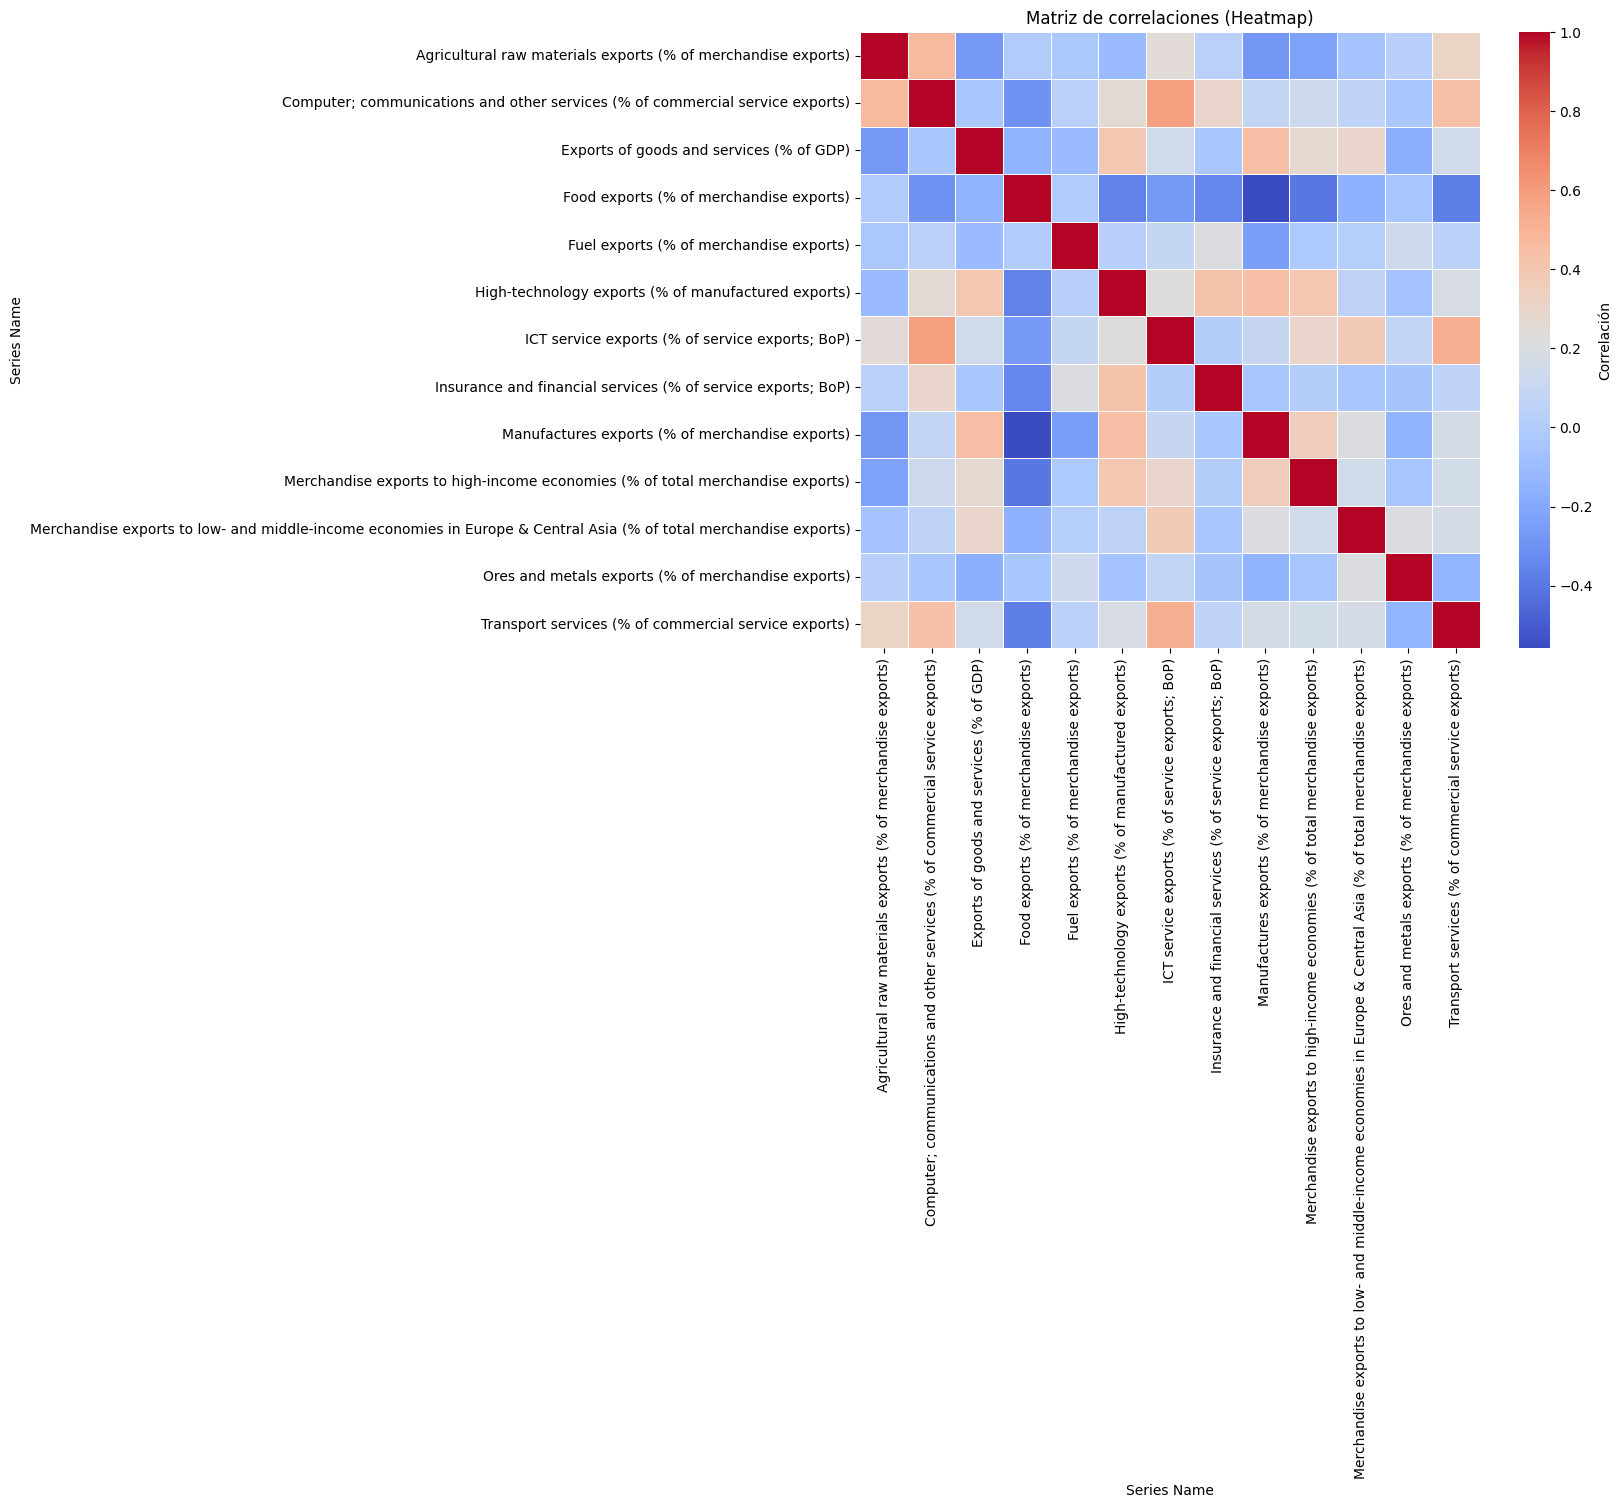

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


corr = df_muestra.corr()

# 3) Dibuja el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=False,        # para que muestre los valores de correlación dentro de cada celda
    fmt=".2f",         # formato de dos decimales
    cmap="coolwarm",   # paleta de colores (puedes usar "viridis", "YlGnBu", etc.)
    linewidths=0.5,    # líneas entre celdas
    cbar_kws={"label": "Correlación"}  # etiqueta del colorbar
)
plt.title("Matriz de correlaciones (Heatmap)")
plt.tight_layout()
plt.show()

In [ ]:
columnas=[["Exports of goods and services (% of GDP)","Merchandise exports to high-income economies (% of total merchandise exports)"],
         ["Exports of goods and services (% of GDP)","Merchandise exports to high-income economies (% of total merchandise exports)","High-technology exports (% of manufactured exports)"],
         ["Exports of goods and services (% of GDP)","Merchandise exports to high-income economies (% of total merchandise exports)","Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"],
         ["Exports of goods and services (% of GDP)","Merchandise exports to high-income economies (% of total merchandise exports)","Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)","High-technology exports (% of manufactured exports)"],
         ["Exports of goods and services (% of GDP)","High-technology exports (% of manufactured exports)","Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)",],
         ]

In [ ]:
columnas[2]

['Exports of goods and services (% of GDP)',
 'Merchandise exports to high-income economies (% of total merchandise exports)',
 'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)']

---


*Escriba* su respuesta en esta celda...


---

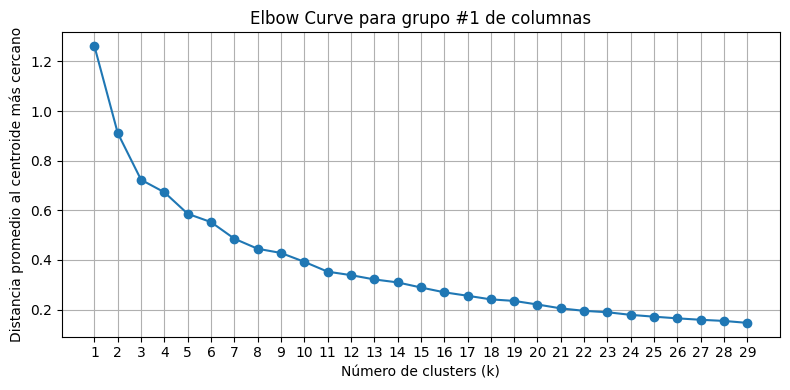

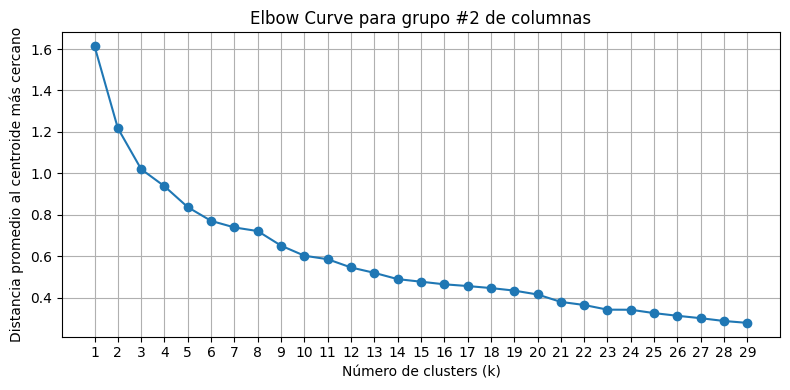

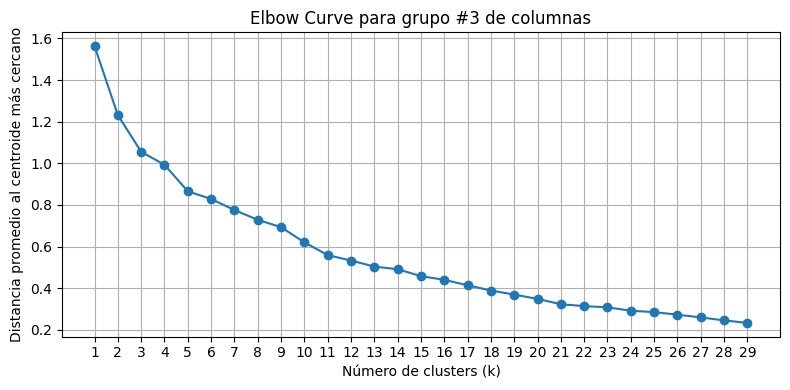

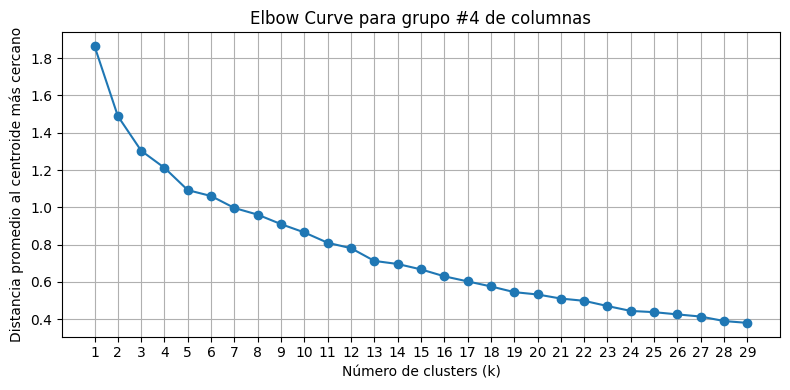

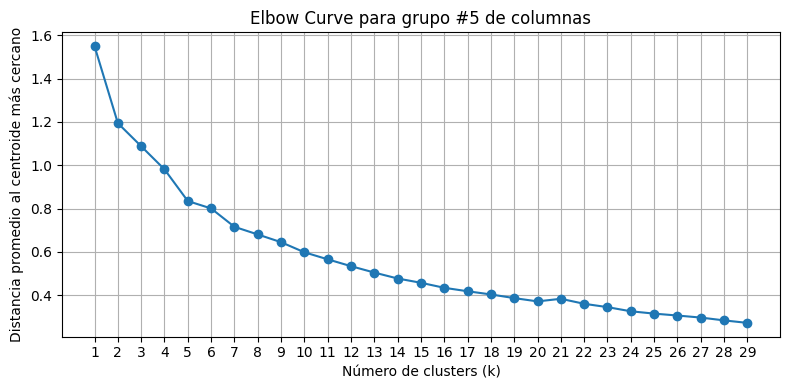

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Supongamos que `columnas` es una lista con los nombres de las 4 columnas que quieres analizar:
#    columnas = ['col1', 'col2', 'col3', 'col4']
# Paso 1: Para cada grupo de columnas, calcular y graficar la curva elbow
for i, group in enumerate(columnas):
    # 1.1 Extraer el sub‐DataFrame 2D con las columnas del grupo actual
    X_grp = df_muestra[group]  # esto es de forma (n_muestras, len(group))
    
    # 1.2 Inicializar la lista donde guardaremos la “dispersión” para cada k
    dispersion = []
    ks = list(range(1, 30))  # k de 1 hasta 29
    
    # 1.3 Iterar sobre cada k para calcular la distancia promedio al centroide
    for k in ks:
        model = KMeans(n_clusters=k, random_state=0)
        model.fit(X_grp)  # X_grp es 2D, shape = (n_muestras, n_variables_del_grupo)
        
        # 1.3.1 Calcular distancias euclidianas de cada punto a cada centroide
        dist_ecl = cdist(X_grp, model.cluster_centers_, metric='euclidean')
        # 1.3.2 Tomar la distancia mínima (centroide más cercano) por cada muestra
        min_dist = np.min(dist_ecl, axis=1)
        # 1.3.3 Promediar esas distancias mínimas
        average_dis = np.mean(min_dist)
        dispersion.append(average_dis)
    
    # 1.4 Al terminar de recorrer todos los k, graficar la curva elbow para este grupo
    plt.figure(figsize=(8, 4))
    plt.plot(ks, dispersion, marker='o', linestyle='-')
    plt.grid(True)
    plt.title(f'Elbow Curve para grupo #{i+1} de columnas')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Distancia promedio al centroide más cercano')
    plt.xticks(ks)
    plt.tight_layout()
    plt.show()

In [ ]:
columnas[2]

['Exports of goods and services (% of GDP)',
 'Merchandise exports to high-income economies (% of total merchandise exports)',
 'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)']

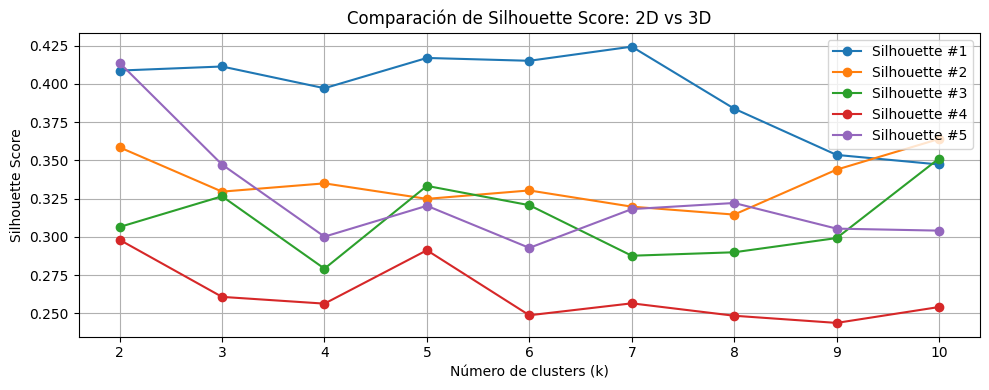

   grupo  n_clusters  silhouette
5     #1           7    0.424377
17    #2          10    0.363997
26    #3          10    0.351220
27    #4           2    0.298027
36    #5           2    0.413747


In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# 1) Preparamos un diccionario para guardar resultados
resultados_sil = {
    'grupo': [],
    'n_clusters': [],
    'silhouette': []
}
# 2) Para cada grupo (2D vs 3D) y cada k, calculamos el Silhouette Score
for nombre_grupo, cols in [('#1', columnas[0]), ('#2', columnas[1]),("#3",columnas[2]),("#4",columnas[3]),("#5",columnas[4])]:
    X = df_muestra[cols].dropna()  # nos aseguramos de no tener NaN
    for k in range(2, 11):  # rango típico de k para Silhouette (de 2 a 10)
        model = KMeans(n_clusters=k, random_state=0)
        etiquetas = model.fit_predict(X)
        
        # Calcular Silence Score (solo si k>=2)
        sil = silhouette_score(X, etiquetas)
        
        resultados_sil['grupo'].append(nombre_grupo)
        resultados_sil['n_clusters'].append(k)
        resultados_sil['silhouette'].append(sil)

# 3) Convertir a DataFrame y mostrar
df_sil = pd.DataFrame(resultados_sil)

# 4) Graficar para comparar visualmente
plt.figure(figsize=(10, 4))
for nombre_grupo, df_sub in df_sil.groupby('grupo'):
    plt.plot(
        df_sub['n_clusters'],
        df_sub['silhouette'],
        marker='o',
        label=f"Silhouette {nombre_grupo}"
    )

plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Comparación de Silhouette Score: 2D vs 3D")
plt.legend()
plt.grid(True)
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()

# 5) También podemos ver numéricamente cuál es el mejor Silhouette para cada caso
mejores = df_sil.loc[df_sil.groupby('grupo')['silhouette'].idxmax()]
print(mejores)

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


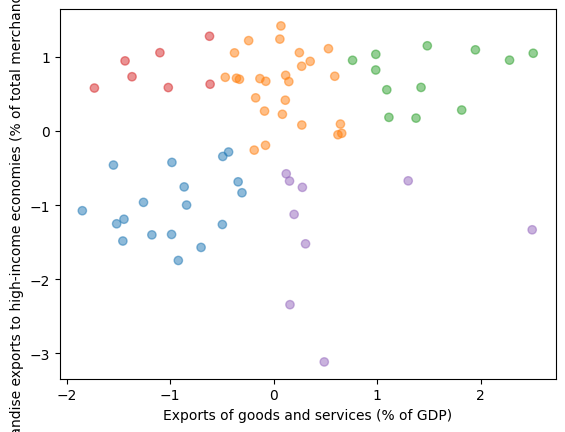

In [ ]:
# scatter plot

#K-means con dos clusters (k=2)
model = KMeans(n_clusters = 5)
#Entrenamos
model.fit(df_muestra[columnas[0]])


labels = model.labels_  # array de longitud n_muestras con valores en {0,1,...,8}

# 2) Elegimos un colormap con al menos 9 colores (por ejemplo 'tab10' tiene 10 colores)
cmap = plt.get_cmap('tab10')  

# 3) Generamos el vector de colores mapeando cada etiqueta a un color distinto
#    Al usar cmap(i), devuelve un RGBA; i debe estar en [0, cmap.N-1] (aquí N=10).
colors = [cmap(label) for label in labels]
plt.scatter(x=df_muestra["Exports of goods and services (% of GDP)"], y=df_muestra["Merchandise exports to high-income economies (% of total merchandise exports)"],
             alpha=0.5, color=colors) #alpha es la transparencia
plt.xlabel("Exports of goods and services (% of GDP)")
plt.ylabel("Merchandise exports to high-income economies (% of total merchandise exports)")
plt.show()

---


*Escriba* su respuesta en esta celda...


---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


[0.2502697 0.1667074]
El total de la varianza explicada por PCA:  41.699999999999996 %


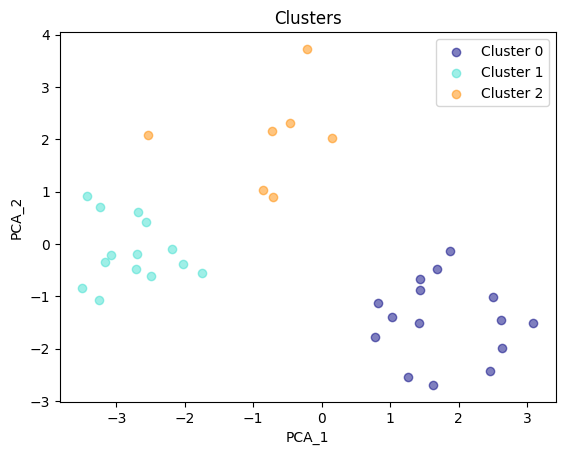

In [ ]:
from sklearn.decomposition import PCA
# Realizamos PCA para graficar los resultados:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_muestra)
var_exp = pca.explained_variance_ratio_
print(var_exp)
print('El total de la varianza explicada por PCA: ',round(sum(var_exp),4)*100,'%')

model = KMeans(n_clusters=5)
#Entrenamos
model.fit(df_pca)

# Realicemos un scatter plot de los datos coloreando los clusters
color = np.where(model.labels_ == 0, 'navy', np.where(model.labels_ ==1 ,'turquoise','darkorange'))

for etiqueta, col in zip([0, 1, 2], ['navy', 'turquoise', 'darkorange']):
    ix = (model.labels_ == etiqueta)
    plt.scatter(df_pca[ix, 0], df_pca[ix, 1], c=col, label=f'Cluster {etiqueta}', alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

Varianza explicada por componente (3D): [0.2502697  0.1667074  0.11175462]
Total varianza en las 3 componentes: 52.87 %


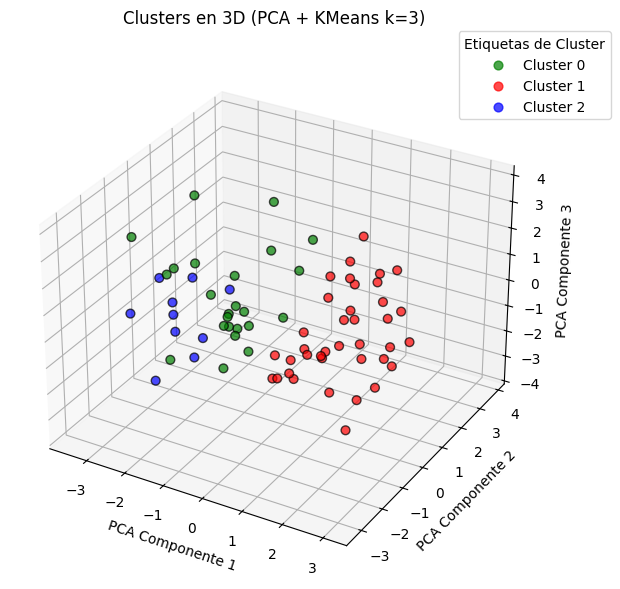

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # necesario para la proyección 3D

# 1) Ejecutar un PCA con 3 componentes
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(df_muestra)  # resultado: matriz (n_muestras, 3)

# (Opcional) Ver cuánto explica cada componente
print("Varianza explicada por componente (3D):", pca3.explained_variance_ratio_)
print("Total varianza en las 3 componentes:", round(pca3.explained_variance_ratio_.sum(), 4) * 100, "%")

# 2) Ajustar K-Means en esas 3 componentes usando k óptimo (por ejemplo, k=3)
k_optimo = 3  # reemplaza con el valor que hayas decidido
km3 = KMeans(n_clusters=k_optimo, random_state=0)
labels3 = km3.fit_predict(X_pca3)  # etiquetas de cluster para cada muestra

# 3) Elegir un color distinto para cada cluster (hasta 9 clusters, por ejemplo)
#    Aquí generamos 3 colores aleatorios (o podrías escoger un colormap).
rng = np.random.RandomState(42)

colores_fijos = {
    0: 'green',   # cluster 0 → verde
    1: 'red',     # cluster 1 → rojo
    2: 'blue'     # cluster 2 → azul
}

# 2) Construimos el array de colores para cada punto
colors3 = [colores_fijos[label] for label in labels3]

# 4) Crear figura 3D y graficar
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Cada punto en 3D: (X_pca3[i,0], X_pca3[i,1], X_pca3[i,2])
ax.scatter(
    X_pca3[:, 0], 
    X_pca3[:, 1], 
    X_pca3[:, 2],
    c=colors3,
    s=40,         # tamaño de los puntos
    alpha=0.7,    # un poco de transparencia
    edgecolor='k' # borde negro para que destaquen mejor
)

# Etiquetas y título
ax.set_title(f'Clusters en 3D (PCA + KMeans k={k_optimo})', pad=20)
ax.set_xlabel('PCA Componente 1')
ax.set_ylabel('PCA Componente 2')
ax.set_zlabel('PCA Componente 3')

# (Opcional) Mostrar leyenda manual si quieres etiquetar cada cluster
for cluster_id, nombre_color in colores_fijos.items():
    ax.scatter([], [], [], c=nombre_color, label=f'Cluster {cluster_id}', s=40, alpha=0.7)
ax.legend(title="Etiquetas de Cluster", loc='upper right', bbox_to_anchor=(1.15, 1.05))

plt.tight_layout()
plt.show()


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [ ]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}
df_final['Continent'] = df_final['Country Name'].map(country_continent_mapping)
df_final


Series Name        Country Name  \
6                       Andorra   
10                    Argentina   
11                      Armenia   
12                        Aruba   
14                      Austria   
..                          ...   
244                     Tunisia   
249                      Uganda   
252              United Kingdom   
253               United States   
261          West Bank and Gaza   

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
6                                                    -0.469603               
10                                                   -0.386168               
11                                                   -0.488024               
12                                                   -0.561430               
14                                                   -0.194858               
..                                                         ...               
244                                                  -0.506075               
249                                                  -0.008120               
252                                                  -0.457865               
253                                                  -0.064429               
261                                                  -0.362301               

Series Name  Computer; communications and other services (% of commercial service exports)  \
6                                                    -1.354481                               
10                                                    0.581308                               
11                                                   -0.718222                               
12                                                   -1.620059                               
14                                                    0.253465                               
..                                                         ...                               
244                                                   0.775957                               
249                                                  -1.129514                               
252                                                   0.738337                               
253                                                   0.545493                               
261                                                   0.556587                               

Series Name  Exports of goods and services (% of GDP)  \
6                                            1.092556   
10                                          -1.457618   
11                                           0.985846   
12                                           2.497442   
14                                           0.986499   
..                                                ...   
244                                          0.589856   
249                                         -1.517656   
252                                         -0.468079   
253                                         -1.548535   
261                                         -1.099544   

Series Name  Food exports (% of merchandise exports)  \
6                                          -1.251668   
10                                          1.545791   
11                                         -0.597900   
12                                          2.336244   
14                                         -0.875423   
..                                               ...   
244                                        -0.613980   
249                                         0.816931   
252                                        -0.956140   
253                                        -0.793527   
261                                        -0.151609   

Series Name  Fuel exports (% of merchandise exports)  \
6                                          -0.868447   
10                                         

### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


[0.2502697 0.1667074]
El total de la varianza explicada por PCA:  41.699999999999996 %


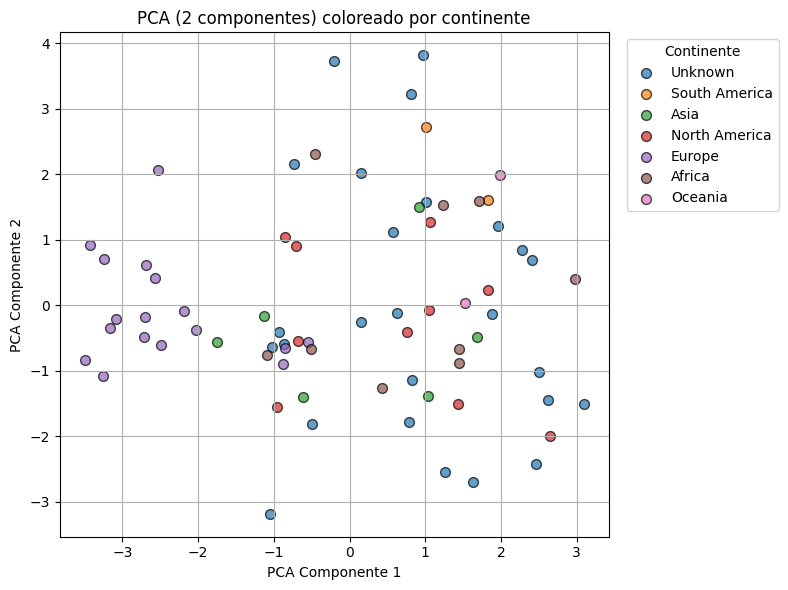

In [ ]:
from sklearn.decomposition import PCA
# Realizamos PCA para graficar los resultados:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_muestra)
var_exp = pca.explained_variance_ratio_
print(var_exp)
print('El total de la varianza explicada por PCA: ',round(sum(var_exp),4)*100,'%')

numerical_cols = df_muestra.select_dtypes(include='number').columns.tolist()
X = df_muestra[numerical_cols].values

# — 2) Ejecutar PCA con 2 componentes
pca = PCA(n_components=2)
coords = pca.fit_transform(X)  # coords será un array de forma (n_paises, 2)


# — 3) Construir un DataFrame con las coordenadas PCA + país + continente
df_pca = pd.DataFrame({
    'PCA1': coords[:, 0],
    'PCA2': coords[:, 1],
    'Country Name': df_final['Country Name'].values
})

# Mapear cada país a su continente
df_pca['Continent'] = df_pca['Country Name'].map(country_continent_mapping)

# En caso de que algún país no esté en el mapping, poner 'Unknown'
df_pca['Continent'] = df_pca['Continent'].fillna('Unknown')

# — 4) Graficar scatterplot coloreando por continente
plt.figure(figsize=(8, 6))

# Extraemos la lista de continentes únicos y asignamos un color a cada uno
continentes = df_pca['Continent'].unique()
colores = plt.cm.tab10(range(len(continentes)))  # paleta de hasta 10 colores
color_map = dict(zip(continentes, colores))


# Dibujar cada punto con el color de su continente
for cont in continentes:
    subset = df_pca[df_pca['Continent'] == cont]
    plt.scatter(
        subset['PCA1'],
        subset['PCA2'],
        c=[color_map[cont]],
        label=cont,
        s=50,
        alpha=0.7,
        edgecolor='k'
    )

plt.title("PCA (2 componentes) coloreado por continente")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.legend(title="Continente", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



Varianza explicada por cada componente: [0.2502697 0.1667074]
Total varianza explicada (2 comp.): 41.699999999999996 %


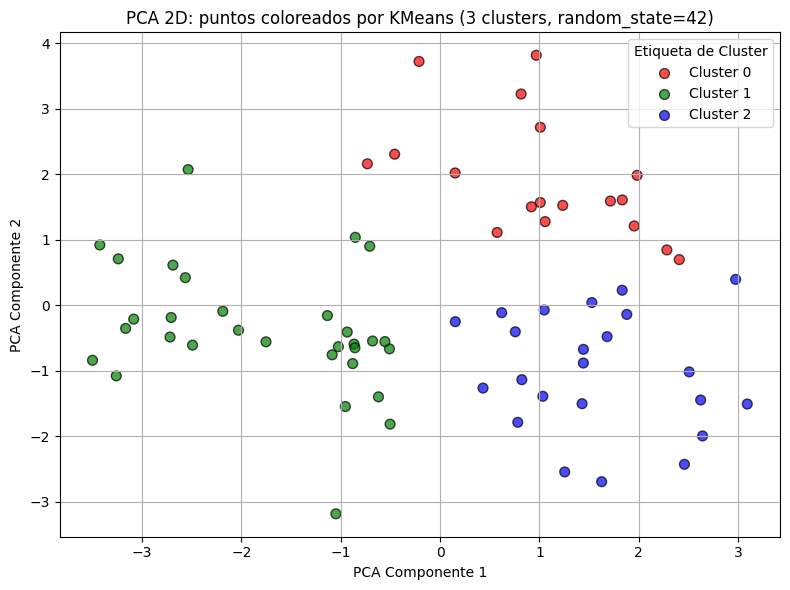

In [ ]:

# 1) Ejecutar PCA con 2 componentes sobre df_muestra:
pca = PCA(n_components=2)
coords = pca.fit_transform(df_muestra.values)  # coords.shape = (n_paises, 2)

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Total varianza explicada (2 comp.):", round(pca.explained_variance_ratio_.sum(), 4) * 100, "%")

# 2) Ajustar KMeans (3 clusters, random_state=42) usando las dos coordenadas PCA:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(coords)

# 3) Generar el scatterplot coloreando por etiqueta de cluster:
plt.figure(figsize=(8, 6))

# Para tener tres colores distinguibles (por ejemplo: rojo, verde y azul)
palette = {0: 'red', 1: 'green', 2: 'blue'}
colors = [palette[label] for label in labels]

plt.scatter(
    coords[:, 0],     # PCA componente 1
    coords[:, 1],     # PCA componente 2
    c=colors,
    s=50,
    alpha=0.7,
    edgecolor='k'
)

plt.title("PCA 2D: puntos coloreados por KMeans (3 clusters, random_state=42)")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")

# Crear leyenda manual para cada cluster
for cluster_id, color in palette.items():
    plt.scatter([], [], c=color, label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='k')
plt.legend(title="Etiqueta de Cluster", loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [ ]:
df_pca['Cluster'] = labels 
ct = pd.crosstab(df_pca['Continent'], df_pca['Cluster'])

# 2) Convertimos esos conteos en proporciones por fila (por continente)
prop_por_continente = ct.div(ct.sum(axis=1), axis=0)

# 3) Opcional: podemos renombrar las columnas para que diga “Cluster 0”, etc.
prop_por_continente.columns = [f"Cluster {c}" for c in prop_por_continente.columns]

# Si no usas ace_tools, basta con:
print(prop_por_continente.round(3))

               Cluster 0  Cluster 1  Cluster 2
Continent                                     
Africa             0.333      0.222      0.444
Asia               0.167      0.500      0.333
Europe             0.000      1.000      0.000
North America      0.100      0.400      0.500
Oceania            0.500      0.000      0.500
South America      1.000      0.000      0.000
Unknown            0.385      0.192      0.423


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


---


*Escriba* su respuesta en esta celda...


---